In [400]:
import pandas as pd
import random
random.seed()

# Importation des données sexe, age et revenu

In [401]:
tweets_sexe = pd.read_hdf('tweets_sexe.hdf', 'prediction_sexe')
tweets_age = pd.read_hdf('tweets_age.hdf', 'prediction_age')
tweets_revenu = pd.read_hdf('tweets_revenu.hdf', 'prediction_revenu')

## I) Todo1 - extrait 2 séries de 21 tweets hommes et 21 tweets femmes

In [402]:
tweets_sexe.head()
# id : l'identifiant du tweet
# tweet : texte du tweet
# user : personne qui a écrit le tweet
# sexe : sexe de la personne qui a écrit le tweet
# age : age de la personne qui a écrit le tweet
# revenu : classe de revenu de la personne qui a écrit le tweet
# logit_f : le logit féminin du réseau de neurone  (entre -1 (très anti-féminin) et 1 (très féminin))
# logit_h : le logit masculin du réseau de neurone  (entre -1 (très anti-masculin) et 1 (très masculin))

,tweet,user,sexe,age,revenu,logit_f,logit_h
id,,,,,,,
682724985656455168,louisanne elle m'a dit tête de zob :(,2584618633,h,jeune,cl_3,0.544449,-0.810053
685372375282651136,@Sadheresy @AntoineMtte @Emilie_Leroux @Theo_r...,2584618633,h,jeune,cl_3,-0.613004,0.656495
692844597622407168,j'ai du semer de la bonne grosse bouse quand o...,2584618633,h,jeune,cl_3,0.544580,-0.810311
693466939084181504,"@punchylychee j'ai fait ça une fois, et un jou...",2584618633,h,jeune,cl_3,0.408440,0.095176
738492728070275072,ça me fait toujours peur les gens qui désac :(,2584618633,h,jeune,cl_3,0.544487,-0.810077


In [403]:
tweets_sexe.shape # la taille du dataframe

(114348, 7)

## calcule des scores femme et homme

In [404]:
from scipy.special import softmax
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

scores = [tweets_sexe["logit_f"],tweets_sexe["logit_h"]]
soft = softmax(scores)
soft

array([[0.79486482, 0.2193431 , 0.794928  , ..., 0.79470467, 0.68157088,
        0.55695888],
       [0.20513518, 0.7806569 , 0.205072  , ..., 0.20529533, 0.31842912,
        0.44304112]])

In [405]:
soft.sum(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [406]:
data = pd.DataFrame(soft)
data = data.T
data.index = tweets_sexe.index
data.head()

,0,1
id,,
682724985656455168,0.794865,0.205135
685372375282651136,0.219343,0.780657
692844597622407168,0.794928,0.205072
693466939084181504,0.577682,0.422318
738492728070275072,0.794875,0.205125


In [407]:
# concatanation des dataframes sexe et les scores
tweet_sexe = pd.concat([tweets_sexe,data],axis = 1) 
tweet_sexe.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,0,1
id,,,,,,,,,
682724985656455168,louisanne elle m'a dit tête de zob :(,2584618633,h,jeune,cl_3,0.544449,-0.810053,0.794865,0.205135
685372375282651136,@Sadheresy @AntoineMtte @Emilie_Leroux @Theo_r...,2584618633,h,jeune,cl_3,-0.613004,0.656495,0.219343,0.780657
692844597622407168,j'ai du semer de la bonne grosse bouse quand o...,2584618633,h,jeune,cl_3,0.544580,-0.810311,0.794928,0.205072
693466939084181504,"@punchylychee j'ai fait ça une fois, et un jou...",2584618633,h,jeune,cl_3,0.408440,0.095176,0.577682,0.422318
738492728070275072,ça me fait toujours peur les gens qui désac :(,2584618633,h,jeune,cl_3,0.544487,-0.810077,0.794875,0.205125


In [408]:
# Je renomme les colonnes 0 et 1 par P_f et P_H
tweet_sexe.rename(columns={0: 'p_f', 
                           1: 'p_h'}, inplace = True)
tweet_sexe.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f,p_h
id,,,,,,,,,
682724985656455168,louisanne elle m'a dit tête de zob :(,2584618633,h,jeune,cl_3,0.544449,-0.810053,0.794865,0.205135
685372375282651136,@Sadheresy @AntoineMtte @Emilie_Leroux @Theo_r...,2584618633,h,jeune,cl_3,-0.613004,0.656495,0.219343,0.780657
692844597622407168,j'ai du semer de la bonne grosse bouse quand o...,2584618633,h,jeune,cl_3,0.544580,-0.810311,0.794928,0.205072
693466939084181504,"@punchylychee j'ai fait ça une fois, et un jou...",2584618633,h,jeune,cl_3,0.408440,0.095176,0.577682,0.422318
738492728070275072,ça me fait toujours peur les gens qui désac :(,2584618633,h,jeune,cl_3,0.544487,-0.810077,0.794875,0.205125


In [409]:
# J'extrait les colonnes que j'ai besoin
data_sexe = tweet_sexe[["tweet","user","sexe","age","revenu","logit_f","logit_h","p_f"]]
data_sexe.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
682724985656455168,louisanne elle m'a dit tête de zob :(,2584618633,h,jeune,cl_3,0.544449,-0.810053,0.794865
685372375282651136,@Sadheresy @AntoineMtte @Emilie_Leroux @Theo_r...,2584618633,h,jeune,cl_3,-0.613004,0.656495,0.219343
692844597622407168,j'ai du semer de la bonne grosse bouse quand o...,2584618633,h,jeune,cl_3,0.544580,-0.810311,0.794928
693466939084181504,"@punchylychee j'ai fait ça une fois, et un jou...",2584618633,h,jeune,cl_3,0.408440,0.095176,0.577682
738492728070275072,ça me fait toujours peur les gens qui désac :(,2584618633,h,jeune,cl_3,0.544487,-0.810077,0.794875


In [410]:
# trier p_f du plus bas au plus haut 
data_sexe = data_sexe.sort_values(by = ['p_f'])  
data_sexe.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
349248698724786176,@Yanito534 sur jaja ? C'est l'équipe encore qu...,281476829,h,jeune,cl_1,-0.789271,0.608617,0.198152
791354747848646656,La con de sa mère la pute jsuis a la chicha y ...,1938313447,h,jeune,cl_1,-0.751665,0.594950,0.206424
591364385639112704,Oh les batar #Lrt,2255495562,h,jeune,cl_2,-0.659211,0.667315,0.209734
936855475148136448,@didierjodin Excellent !,613293979,h,vieux,cl_1,-0.649554,0.666834,0.211420
280797168112136195,@Aurze Pas bien ça,119808332,h,jeune,cl_1,-0.647864,0.660284,0.212797


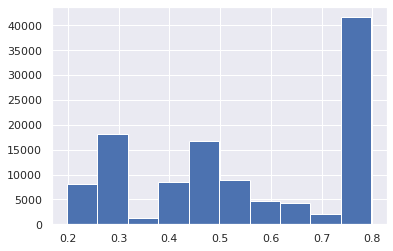

In [411]:
# Je regarde la distribution de P_f
hist = data_sexe['p_f'].hist()

array([<AxesSubplot:title={'center':'f'}>,
       <AxesSubplot:title={'center':'h'}>], dtype=object)

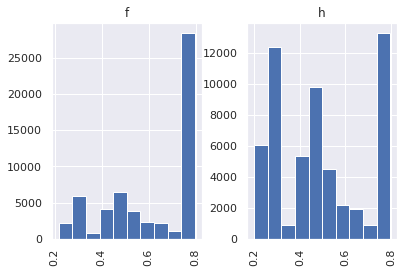

In [412]:
# Je regarde la distribution de P_f par sexe
data_sexe.hist(column='p_f',by='sexe')

In [413]:
# J'extrait tous les hommes dans le dataframe Sexe
tweet_hom = data_sexe[data_sexe['sexe']=='h'] 
tweet_hom.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
349248698724786176,@Yanito534 sur jaja ? C'est l'équipe encore qu...,281476829,h,jeune,cl_1,-0.789271,0.608617,0.198152
791354747848646656,La con de sa mère la pute jsuis a la chicha y ...,1938313447,h,jeune,cl_1,-0.751665,0.594950,0.206424
591364385639112704,Oh les batar #Lrt,2255495562,h,jeune,cl_2,-0.659211,0.667315,0.209734
936855475148136448,@didierjodin Excellent !,613293979,h,vieux,cl_1,-0.649554,0.666834,0.211420
280797168112136195,@Aurze Pas bien ça,119808332,h,jeune,cl_1,-0.647864,0.660284,0.212797


In [414]:
tweet_hom.shape

(57202, 8)

In [415]:
# J'extrait aléatoirement 21 hommes
tweet_hom_21 = tweet_hom.sample(n = 21,random_state=1) 
tweet_hom_21.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
1075167995104845824,Ce sera à lire ce mercredi dans @Le_Figaro sou...,76416402,h,vieux,cl_3,-0.400161,0.456622,0.298012
1063000354114228225,Sacré bêtises....... https://t.co/XRiViWWe1s,368540998,h,moyen,cl_2,0.055600,0.324450,0.433189
377070979723558912,@Boomsknowles @dbyaissata Pourquoi tu dit ça ?,186059969,h,jeune,cl_1,-0.084115,0.323269,0.399540
601701179106697217,Clairement @Gael_Monfils a un coup à jouer ! #...,293127258,h,jeune,cl_2,-0.397496,0.450962,0.299756
996854060807540741,@LDREADEUX @EidemEG @Honor_FR Je te comprend p...,723544291,h,jeune,cl_1,-0.613417,0.657039,0.219179


In [416]:
#tweets_sexe.to_excel('test.xlsx')

In [417]:
# J'extrait toutes les femmes dans le dataframe Sexe
tweet_fem = data_sexe[data_sexe['sexe'] == 'f'] 
tweet_fem.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
875667451572359168,Prise en LP à Belfort !,1693994462,f,jeune,cl_2,-0.632288,0.651176,0.216961
547861549776666624,@Phlaurentain de quoi,400104695,f,jeune,cl_2,-0.638272,0.643254,0.217291
305818832910573569,@MaxC__ Aucun des trois,155633627,f,jeune,cl_1,-0.615880,0.656388,0.218869
422163099521925120,jouer jouer jouer jouer jouer,1311924529,f,jeune,cl_3,-0.613801,0.657528,0.219030
536239186819710976,Il a match demain,1218922740,f,jeune,cl_3,-0.613810,0.657513,0.219031


In [418]:
# J'extrait aléatoirement 21 femmes
tweet_fem_21 = tweet_fem.sample(n = 21,random_state=1) 
tweet_fem_21.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
388001752664268800,Il fait froid #nord,327413233,f,jeune,cl_1,-0.433601,0.470449,0.288219
819287368393953280,@FCoevoet vendredi soir là et samedi matin bb,510724828,f,jeune,cl_1,-0.612349,0.655590,0.219610
706211682352308225,Elle gère la Strasbourgeoise 😍 #thevoice #TF1,623308527,f,jeune,cl_3,0.544206,-0.810065,0.794827
389550969635475456,@ningilpas87 @StanleyEnow alors c'est mon travail,155846223,f,jeune,cl_3,0.534181,-0.803106,0.792043
559416768566132736,@Justine_Dkndt Mh d'accord,503373686,f,jeune,cl_2,0.542097,-0.808821,0.794280


In [419]:
# concatanation des deux dataframes
tweets_sexe_42 = pd.concat([tweet_fem_21,tweet_hom_21]) 
tweets_sexe_42.head()

,tweet,user,sexe,age,revenu,logit_f,logit_h,p_f
id,,,,,,,,
388001752664268800,Il fait froid #nord,327413233,f,jeune,cl_1,-0.433601,0.470449,0.288219
819287368393953280,@FCoevoet vendredi soir là et samedi matin bb,510724828,f,jeune,cl_1,-0.612349,0.655590,0.219610
706211682352308225,Elle gère la Strasbourgeoise 😍 #thevoice #TF1,623308527,f,jeune,cl_3,0.544206,-0.810065,0.794827
389550969635475456,@ningilpas87 @StanleyEnow alors c'est mon travail,155846223,f,jeune,cl_3,0.534181,-0.803106,0.792043
559416768566132736,@Justine_Dkndt Mh d'accord,503373686,f,jeune,cl_2,0.542097,-0.808821,0.794280


In [420]:
tweets_sexe_42.shape

(42, 8)

In [421]:
#tweets_sexe_42.to_excel('tweets_sexe_42.xlsx')

## II) Extrait de 3 séries de 14 tweets jeunes, 14 tweets moyens et 14 tweets vieux 

In [422]:
tweets_age.head()
# id : l'identifiant du tweet
# tweet : texte du tweet
# user : personne qui a écrit le tweet
# sexe : sexe de la personne qui a écrit le tweet
# age : age de la personne qui a écrit le tweet
# revenu : classe de revenu de la personne qui a écrit le tweet
# predictions_age : la prédiction de l'age par le réseau : 0 -> jeune ; 1 -> moyen ; 3 -> vieux


,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
682724985656455168,louisanne elle m'a dit tête de zob :(,2584618633,h,jeune,cl_3,-0.085091
685372375282651136,@Sadheresy @AntoineMtte @Emilie_Leroux @Theo_r...,2584618633,h,jeune,cl_3,0.999287
692844597622407168,j'ai du semer de la bonne grosse bouse quand o...,2584618633,h,jeune,cl_3,-0.109568
693466939084181504,"@punchylychee j'ai fait ça une fois, et un jou...",2584618633,h,jeune,cl_3,0.037386
738492728070275072,ça me fait toujours peur les gens qui désac :(,2584618633,h,jeune,cl_3,-0.101376


In [423]:
tweets_age.shape

(113556, 6)

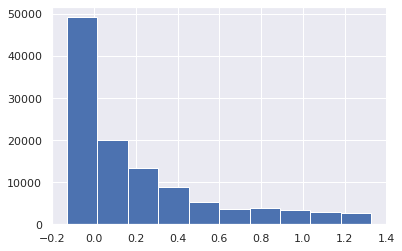

In [424]:
# Je regarde la distribution de la prediction de l'age 
hist = tweets_age['predictions_age'].hist()

array([[<AxesSubplot:title={'center':'jeune'}>,
        <AxesSubplot:title={'center':'moyen'}>],
       [<AxesSubplot:title={'center':'vieux'}>, <AxesSubplot:>]],
      dtype=object)

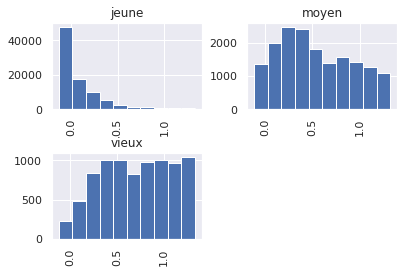

In [425]:
# Je regarde la distribution de la prediction de l'age par age
tweets_age.hist(column = 'predictions_age',by = 'age')

In [426]:
# trier prédictions_age du plud bas au plus haut  
tweets_age = tweets_age.sort_values(by = ['predictions_age']) 
tweets_age.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
434637235690807296,Maisssssss allez kesssss tua,776201617,f,jeune,cl_1,-0.130788
523520038545137664,grand pereeeeeee jte dissssssssssssssss je tai...,2270261138,h,jeune,cl_3,-0.128399
843923628815241217,Mélenchon président de la république 🇫🇷,531620322,h,jeune,cl_1,-0.126036
1075045698654167042,Go aux Galeries comme toujours,110439527,f,jeune,cl_1,-0.125443
585860926244552706,Moon beau pere i gere trop ololo c'est mon gar...,1539062953,f,jeune,cl_1,-0.124674


In [427]:
# J'extrais tous les jeunes de la dataframe age 
tweet_jeune = tweets_age[tweets_age['age'] == 'jeune'] 
tweet_jeune.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
434637235690807296,Maisssssss allez kesssss tua,776201617,f,jeune,cl_1,-0.130788
523520038545137664,grand pereeeeeee jte dissssssssssssssss je tai...,2270261138,h,jeune,cl_3,-0.128399
843923628815241217,Mélenchon président de la république 🇫🇷,531620322,h,jeune,cl_1,-0.126036
1075045698654167042,Go aux Galeries comme toujours,110439527,f,jeune,cl_1,-0.125443
585860926244552706,Moon beau pere i gere trop ololo c'est mon gar...,1539062953,f,jeune,cl_1,-0.124674


In [428]:
# extraire aléatoirement 14 jeunes du dataframe de l'ensemble des jeunes
tweet_jeune_14 = tweet_jeune.sample(n = 14,random_state = 1) 
tweet_jeune_14.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
1051943181577797632,@voivodd IL EST SORTI ?,584846151,f,jeune,cl_1,-0.082045
514853789397188609,@MDegouy je comprend ta douleur,983358288,h,jeune,cl_3,-0.016190
705066069879345152,@AnnaTlb @ReactionsMA Nop et ça me va très bie...,385437913,f,jeune,cl_2,-0.076179
617012401439940608,Ca me rend ouf 😌,2201666077,h,jeune,cl_1,-0.106055
997860315487526913,@PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à to...,1296842112,h,jeune,cl_2,0.120374


In [429]:
# J'extrais tous les moyens de la dataframe age 
tweet_moyen = tweets_age[tweets_age['age'] == 'moyen'] # Extraire tous les moyens
tweet_moyen.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
781580825829793792,Ongles limé ✅ vernis ✅,296781279,f,moyen,cl_1,-0.121304
615619765172891649,Rip Alain de canal plus,477801562,f,moyen,cl_1,-0.120844
459386929029840897,On se demande bien pourquoi?? ^^,392175444,f,moyen,cl_3,-0.119845
718769819450023940,Le reportage sur les pompiers 😍,296781279,f,moyen,cl_1,-0.119597
681072259226796032,C'est qd je vais chez mes parents que je sais ...,155590127,f,moyen,cl_2,-0.118614


In [430]:
# extraire aléatoirement 14 moyens du dataframe de l'ensemble des moyens
tweet_moyen_14 = tweet_moyen.sample(n = 14,random_state=1)
tweet_moyen_14.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
651410895696994304,Je soutiens la #TeamChief dans la bataille pou...,1214365771,h,moyen,cl_3,0.331813
674359856468488192,@ThomasSotto @Europe1 par pitié parlez du désa...,830851879,h,moyen,cl_3,1.142865
673402356902584320,@MarionLambertRP Hey déjà debout ? Merci. Bonn...,1336623392,h,moyen,cl_3,0.365561
479919175180496896,#FF @hlamtrong pour ses reportages sur le Hell...,455138015,h,moyen,cl_1,1.254692
682711028082327552,Merci à Karima pour le premier gâteau de 2016 ...,6156182,h,moyen,cl_1,0.878147


In [431]:
# J'extrais tous les vieux de la dataframe age 
tweet_vieux = tweets_age[tweets_age['age'] == 'vieux']
tweet_vieux.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
1042862665251606528,Ces Girondins sont soporifiques,146498140,h,vieux,cl_3,-0.120832
491308836700319745,Elle en veut aurélie,300860930,f,vieux,cl_2,-0.119047
297440672229773312,Cherche au lieu de chialer,121713154,f,vieux,cl_2,-0.117631
478637166026055681,Quel film de dingue L'immortel 🔫💣,916927766,f,vieux,cl_2,-0.117406
896261256927117312,La montagne l'été 👌,146498140,h,vieux,cl_3,-0.117061


In [432]:
# extraire aléatoirement 14 vieux du dataframe de l'ensemble des moyens
tweet_vieux_14 = tweet_vieux.sample(n = 14,random_state=1)

In [433]:
# Concatanation des trois series de 14 tweets
tweets_age_42 = pd.concat([tweet_jeune_14,tweet_moyen_14,tweet_vieux_14]) 
tweets_age_42.head()

,tweet,user,sexe,age,revenu,predictions_age
id,,,,,,
1051943181577797632,@voivodd IL EST SORTI ?,584846151,f,jeune,cl_1,-0.082045
514853789397188609,@MDegouy je comprend ta douleur,983358288,h,jeune,cl_3,-0.016190
705066069879345152,@AnnaTlb @ReactionsMA Nop et ça me va très bie...,385437913,f,jeune,cl_2,-0.076179
617012401439940608,Ca me rend ouf 😌,2201666077,h,jeune,cl_1,-0.106055
997860315487526913,@PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à to...,1296842112,h,jeune,cl_2,0.120374


In [434]:
#tweets_age_42.to_excel('tweets_age_42.xlsx')

## III) Extrait de 3 séries de 14 tweets Cl_1, 14 tweets Cl_2 et 14 tweets  Cl_3

In [435]:
tweets_revenu.head()
# id : l'identifiant du tweet
# tweet : texte du tweet
# user : personne qui a écrit le tweet
# sexe : sexe de la personne qui a écrit le tweet
# age : age de la personne qui a écrit le tweet
# revenu : classe de revenu de la personne qui a écrit le tweet
# predictions_revenu : la prédiction de la classe de revenu par le réseau : 0 -> cl_1 ; 1 -> cl_2 ; 2 -> cl_3


,tweet,user,sexe,age,revenu,predictions_revenu
id,,,,,,
682718329719644160,@Sha_hineze nn pas quand c MA bouteille,417125896,f,jeune,cl_1,0.993707
682716841513476096,@Sha_hineze mais jaaamais ca va se fr tt seul ...,417125896,f,jeune,cl_1,0.993708
684150649961971712,@willogab10 c des menaces jeune homme?,417125896,f,jeune,cl_1,0.993707
686259379880984576,@nesrinehkm pas npq mais voila quoi 😂😂,417125896,f,jeune,cl_1,0.993707
686265479661510656,@lanitthaa d'accord https://t.co/j2bMaXBxmM,417125896,f,jeune,cl_1,0.993709


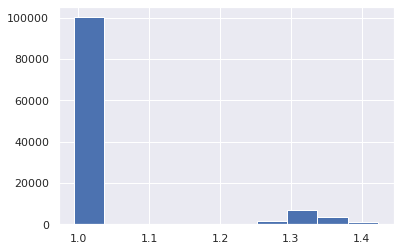

In [436]:
# Je regarde la distribution de la prediction des revenus
hist = tweets_revenu['predictions_revenu'].hist()

array([[<AxesSubplot:title={'center':'cl_1'}>,
        <AxesSubplot:title={'center':'cl_2'}>],
       [<AxesSubplot:title={'center':'cl_3'}>, <AxesSubplot:>]],
      dtype=object)

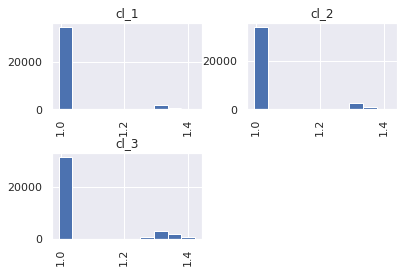

In [437]:
# Je regarde la distribution de la prediction des revenus par revenu
tweets_revenu.hist(column='predictions_revenu',by ='revenu')

In [438]:
dic = {}
nb_classe = 113199/40
nb_valeur = np.linspace(0,113160,42).astype(int)
for i in range(0,len(tweets_revenu["predictions_revenu"])-1):
    i_mod = np.ceil(i/nb_classe)
    dic[str(int(i_mod))] = tweets_revenu["predictions_revenu"][range(nb_valeur[int(i_mod)],nb_valeur[int(i_mod)+1])]

dic["41"] = tweets_revenu["predictions_revenu"][range(113160,113200)]

In [439]:
serie1 = pd.Series([],dtype = pd.StringDtype()) 
index_serie1 = np.array([])
for i in range(len(dic)):
    if (i != len(dic) - 1):
        serie1[i]= dic[str(i)][np.random.randint(0,2759,1)]
        index_serie1 = np.append(index_serie1,serie1[i].index)
        serie1[i] = serie1[i].values
    else:
        serie1[i] = dic[str(i)][np.random.randint(0,39,1)]
        index_serie1 = np.append(index_serie1,serie1[i].index)
        serie1[i] = serie1[i].values
serie1.index = index_serie1

serie1 = pd.DataFrame(serie1)
serie1.columns = ['prediction_revenu']
serie1.astype('float')
# recuperer les tweets
serie1 = tweets_revenu.merge(serie1, how='inner', left_index=True, right_index=True)
serie1['prediction_revenu']= serie1['prediction_revenu'].astype('float')
len(serie1)

42

In [440]:
dic_14_class = {}
nb_valeur_14_class = np.linspace(0,42,14).astype(int)
i = 0
while(i < len(dic)-2):
    i_mod = int(np.ceil(i/3))
    dic_14_class[str(i_mod)] = pd.concat([dic[str(i)],dic[str(i+1)],dic[str(i+2)]])
    dic_14_class[str(i_mod)]= tweets_revenu.drop(['predictions_revenu'],axis=1).merge(dic_14_class[str(i_mod)],
                                                  how='inner', left_index = True, right_index=True)
    
    i = i+3

In [441]:
# Trouver une façon d’extraire 42 valeurs qui rendent compte de toute l’étendue de l’échelle des revenus assignés aux comptes Twitter
#(par exemple par une méthode analogue à celle des centiles mais avec 42 classes).
dic_tweet = {}
tweet_df = pd.DataFrame([])
tweets_revenu_extract = pd.DataFrame(tweets_revenu['tweet'])
for i in range(len(dic_14_class)):
        size_bloc_cl_1 = len(dic_14_class[str(i)]['revenu'][dic_14_class[str(i)]['revenu']=='cl_1'])
        size_bloc_cl_2 = len(dic_14_class[str(i)]['revenu'][dic_14_class[str(i)]['revenu']=='cl_2'])
        size_bloc_cl_3 = len(dic_14_class[str(i)]['revenu'][dic_14_class[str(i)]['revenu']=='cl_3'])

        dic_tweet[str(i)] = dic_14_class[str(i)]['revenu'][dic_14_class[str(i)]['revenu']=='cl_1'][np.random.randint(0,size_bloc_cl_1,1)]
        # dic_tweet[str(i)] = pd.DataFrame(dic_tweet[str(i)])
        dic_tweet[str(i)] = pd.concat([dic_tweet[str(i)],dic_14_class[str(i)]['revenu'][dic_14_class[str(i)]['revenu']=='cl_2'][np.random.randint(0,size_bloc_cl_2,1)]])
        # dic_tweet[str(i)] = pd.DataFrame(dic_tweet[str(i)])
        dic_tweet[str(i)] = pd.concat([dic_tweet[str(i)],dic_14_class[str(i)]['revenu'][dic_14_class[str(i)]['revenu']=='cl_3'][np.random.randint(0,size_bloc_cl_3,1)]])
        dic_tweet[str(i)] = pd.DataFrame(dic_tweet[str(i)])
        tweet_df = pd.concat([tweet_df, dic_tweet[str(i)]],axis=0)

tweet_revenu_42 = tweets_revenu.drop(['revenu'],axis=1).merge(tweet_df ,how ='inner', left_index = True, right_index = True)
tweet_revenu_42.head()

,tweet,user,sexe,age,predictions_revenu,revenu
id,,,,,,
962420324301144066,"Oh, le commentateur de @beINLigue1Confo qui se...",154836480,h,jeune,0.993712,cl_2
673571669110312960,Je veux de la plage et un matelas gonflable.,96859663,h,jeune,0.993708,cl_3
798782253740326912,@DocteurWilliams ouais ouais c'est bien 😏,310963542,f,jeune,0.993707,cl_1
519037914744111104,@ServicePublicFI Mulhouse-Strasbourg en TER: +...,102612953,h,vieux,0.993709,cl_1
914041747805806592,@MorrrganG @sii_ouest Sont gâtés cette année!!,293661206,h,jeune,0.993709,cl_3


In [442]:
#tweet_revenu_42.to_excel('tweet_revenu_42.xlsx')

## IV) Travail sur sur “ne pas” 

In [443]:
data = pd.read_hdf('data.hdf', 'data')
data.head()

,user,tweet,sexe,age,revenu
id,,,,,
683066291649908737,415607950,@Piwpe oui je m'en souviens je crois :),f,jeune,cl_3
685784103275368448,415607950,"TT : ""HARRY A COUPÉ SES CHEVEUX"" https://t.co/...",f,jeune,cl_3
685786087072120832,415607950,@DoctorBelIamy bien bien !,f,jeune,cl_3
685822723977785344,415607950,"@laurelas spa ça, c'est sa réaction qui est tr...",f,jeune,cl_3
685911810785046529,415607950,"Excellent film le Cercle des poètes disparus, ...",f,jeune,cl_3


In [444]:
# J'extrais tous les tweets qui contient "ne pas"
data_ne = data[data['tweet'].str.contains("ne pas")]
data_ne.head()

,user,tweet,sexe,age,revenu
id,,,,,
762062327457906688,520359419,@ericsalliot elle ne blâme pas l'ITF mais la F...,h,jeune,cl_2
1044315042521460736,1496633743,@salopasta Je pense que même si t'es pas proch...,f,jeune,cl_1
503614638953865216,1148980268,Nouvelle astuce pour ne pas se faire voler son...,h,jeune,cl_3
839077070193983488,2867107811,"C'est pas mal Bar, les éboueurs ne passent plu...",f,jeune,cl_2
1004391739547897856,1686688447,@mvcaster Attention à ne pas attraper un rhume...,h,jeune,cl_1


In [445]:
#data_ne.to_excel('data_ne.xlsx')

### 1) extrait 42 tweets dont 21 hommes  et 21 femmes parmis les hommes et femmes 7 jeunes,7 moyen et 7 vieux et subdivisé les 7 en 2,2,3 pour les revenus

In [446]:
# extraire tous les hommes dans le dataframe data "ne pas"
data_ne_h = data_ne[data_ne['sexe'] == 'h']  
data_ne_h .head()

,user,tweet,sexe,age,revenu
id,,,,,
762062327457906688,520359419,@ericsalliot elle ne blâme pas l'ITF mais la F...,h,jeune,cl_2
503614638953865216,1148980268,Nouvelle astuce pour ne pas se faire voler son...,h,jeune,cl_3
1004391739547897856,1686688447,@mvcaster Attention à ne pas attraper un rhume...,h,jeune,cl_1
575063136694329344,1164386155,@Z_Maeliss oui c'est ça lol fin c'est surtout ...,h,jeune,cl_2
615251677977968640,519696611,@MaelleFlechard @OSLBS Mais oui je serais là !...,h,jeune,cl_2


In [447]:
# extraire tous les jeune dans le dataframe des hommes
data_j_h = data_ne_h[data_ne_h['age'] == 'jeune'] 
data_j_h.head()

,user,tweet,sexe,age,revenu
id,,,,,
762062327457906688,520359419,@ericsalliot elle ne blâme pas l'ITF mais la F...,h,jeune,cl_2
503614638953865216,1148980268,Nouvelle astuce pour ne pas se faire voler son...,h,jeune,cl_3
1004391739547897856,1686688447,@mvcaster Attention à ne pas attraper un rhume...,h,jeune,cl_1
575063136694329344,1164386155,@Z_Maeliss oui c'est ça lol fin c'est surtout ...,h,jeune,cl_2
615251677977968640,519696611,@MaelleFlechard @OSLBS Mais oui je serais là !...,h,jeune,cl_2


In [448]:
#data_j_h.to_excel('data_j_h.xlsx')

In [449]:
# extraire 7 jeunes dans le dataframe des jeunes hommes en 2,2,3 pour les revenus
data_7_j_h = data_j_h.iloc[[75,365,330,0,416,360,418],:]
data_7_j_h.head()

,user,tweet,sexe,age,revenu
id,,,,,
609698463832502273,244651086,"C'est incroyable, je trouve tout et n'importe ...",h,jeune,cl_1
989041521956655104,145329660,@Dejbox Votre page ne fonctionne pas! Impossib...,h,jeune,cl_1
816222940266188800,858714042,Le temps ne passe pas vite aujourd'hui...,h,jeune,cl_1
762062327457906688,520359419,@ericsalliot elle ne blâme pas l'ITF mais la F...,h,jeune,cl_2
585034321368641536,782801522,@LeilaBenKhalifa est la preuve qu'une femme Tu...,h,jeune,cl_2


In [450]:
# extraire tous les moyens dans le dataframe des hommes 
data_moy_h = data_ne_h[data_ne_h['age'] == 'moyen'] 
data_moy_h.head()

,user,tweet,sexe,age,revenu
id,,,,,
808185123745202177,249926400,10 Ways comment faire pour ne pas voir Ce pam,h,moyen,cl_3
122963159794454528,23997983,Je crois que mon chat vient de se découvrir un...,h,moyen,cl_3
12352998969,23997983,@TheBrune t'as bien de la chance ne pas être l...,h,moyen,cl_3
837738012255662080,6156182,@janBellard Pour info l'url dans ta bio Twitte...,h,moyen,cl_1
883202381168726016,6156182,Je suis vraiment sûr de ne pas en avoir besoin...,h,moyen,cl_1


In [451]:
#data_moy_h.to_excel('data_moy_h.xlsx')

In [452]:
# extraire 7 moyen dans le dataframe des moyens hommes en 2,2,3 pour les revenus
data_7_moy_h = data_moy_h.iloc[[186,136,178,170,156,191,173],:]
data_7_moy_h.head()

,user,tweet,sexe,age,revenu
id,,,,,
351346930095370242,15868225,@DJSTORM59 Le lien ne fonctionne pas sur iPhon...,h,moyen,cl_1
921060777490042880,165738503,Je reste convaincu que #cardinal n’as pas le n...,h,moyen,cl_1
994249148852563970,210135004,@Nicolasbdf La militance est diverse et ne pas...,h,moyen,cl_2
1006485477640364032,533118991,@Fan_Jiyong Ah je n'avais pas exploré la piste...,h,moyen,cl_2
174092619113185280,412896646,@NICE06MARIE marie tu veux de mon aide tu n'im...,h,moyen,cl_2


In [453]:
# extraire tous les vieux dans le dataframe des hommes
data_vieux_h = data_ne_h[data_ne_h['age']=='vieux'] 
data_vieux_h.head()

,user,tweet,sexe,age,revenu
id,,,,,
629242089251975168,309218498,@fhollande c'est Scandaleux de ne pas avoir li...,h,vieux,cl_1
795604412710420480,6071892,@MUCBarracudas le lien ne fonctionne pas 😕,h,vieux,cl_3
820686896821047297,467776493,#PrimaireLeDebat Attention à ne pas tomber dan...,h,vieux,cl_3
624308778339467265,609473438,"Une machine pas comme les autres, unique au mo...",h,vieux,cl_1
624224858336051200,1539472610,Galerie EN FACE ...13 rue saint Aignan #ANGERS...,h,vieux,cl_1


In [454]:
#data_vieux_h.to_excel('data_vieux_h.xlsx')

In [455]:
# extraire 7 vieux dans le dataframe des vieux hommes en 2,2,3 pour les revenus
data_7_vieux_h = data_vieux_h.iloc[[62,59,92,37,89,88,70],:]
data_7_vieux_h.head()

,user,tweet,sexe,age,revenu
id,,,,,
807200912422871040,246226259,@Cevenn quoi dire si ce n'est que ça ne m'éton...,h,vieux,cl_1
1070370415099424768,301272907,@Thomas_Astruc Je n'ai jamais écrit qu'ils ne ...,h,vieux,cl_1
970440251524173825,201407859,@cinemacanalplus #Oscars2018 Coco est le film ...,h,vieux,cl_2
829385878598467584,333001064,@CathySimply @NamiasRobert Je n'ai pas écouté ...,h,vieux,cl_2
562585289122930688,539136785,RT @limportant_fr: Elisabeth Badinter : «Je ne...,h,vieux,cl_3


In [456]:
# Concatanation des 3 series hommes
data_h_21 = pd.concat([data_7_j_h,data_7_moy_h,data_7_vieux_h])
data_h_21.head()

,user,tweet,sexe,age,revenu
id,,,,,
609698463832502273,244651086,"C'est incroyable, je trouve tout et n'importe ...",h,jeune,cl_1
989041521956655104,145329660,@Dejbox Votre page ne fonctionne pas! Impossib...,h,jeune,cl_1
816222940266188800,858714042,Le temps ne passe pas vite aujourd'hui...,h,jeune,cl_1
762062327457906688,520359419,@ericsalliot elle ne blâme pas l'ITF mais la F...,h,jeune,cl_2
585034321368641536,782801522,@LeilaBenKhalifa est la preuve qu'une femme Tu...,h,jeune,cl_2


In [457]:
# extraire toutes les femmes dans le dataframe data "ne pas "
data_ne_f = data_ne[data_ne['sexe'] == 'f'] 
data_ne_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
1044315042521460736,1496633743,@salopasta Je pense que même si t'es pas proch...,f,jeune,cl_1
839077070193983488,2867107811,"C'est pas mal Bar, les éboueurs ne passent plu...",f,jeune,cl_2
698259819850002433,794495288,Même quand tes profondement pas bien ne pas le...,f,jeune,cl_2
874730530897633280,1517232745,Le seul endroit ds la maison où la wifi ne fon...,f,jeune,cl_1
975440064598638597,1748310608,J'ai une passion pour le ciel c'est hallucinant,f,jeune,cl_1


In [458]:
# extraire tous les jeunes dans le dataframe des femmes
data_j_f = data_ne_f[data_ne_f['age'] == 'jeune'] 
data_j_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
1044315042521460736,1496633743,@salopasta Je pense que même si t'es pas proch...,f,jeune,cl_1
839077070193983488,2867107811,"C'est pas mal Bar, les éboueurs ne passent plu...",f,jeune,cl_2
698259819850002433,794495288,Même quand tes profondement pas bien ne pas le...,f,jeune,cl_2
874730530897633280,1517232745,Le seul endroit ds la maison où la wifi ne fon...,f,jeune,cl_1
975440064598638597,1748310608,J'ai une passion pour le ciel c'est hallucinant,f,jeune,cl_1


In [459]:
#data_j_f.to_excel('data_j_f.xlsx')

In [460]:
# extraire 7 jeunes dans le dataframe des jeunes femmes en 2,2,3 pour les revenus
data_7_j_f = data_j_f.iloc[[495,480,433,498,372,502,496,],:]
data_7_j_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
558367593858596864,2946187473,Parfois je t'aime. Parfois je te déteste. Mais...,f,jeune,cl_1
651621130751639553,2710761770,Beaucoup de personnes ne comprenne pas pourquo...,f,jeune,cl_1
336721293758046208,741353078,Le temps ne me donne pas du tout envis d'aller...,f,jeune,cl_1
592301335128711168,1327204243,"Regle 1: Si tu ne passe pas a autre chose, tu ...",f,jeune,cl_2
554751421061824512,821667894,Marre de ce monde qui ne tourne pas rond......,f,jeune,cl_2


In [461]:
# extraire tous les moyens dans le dataframe des femmes
data_moy_f = data_ne_f[data_ne_f['age'] == 'moyen'] 
data_moy_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
1052885579250196480,6993042,Encore une série @ARTEfr que je vais regarder....,f,moyen,cl_3
448465735065808896,217008192,@Jyngly @eamimi Rolala acheter en double ou ne...,f,moyen,cl_3
822909313807159297,772097797,1 an ..: demain on vas dans le nord faire les ...,f,moyen,cl_1
566309602472783872,2230469366,"@JujuCharly Je confirme, Padlet ne fonctionne ...",f,moyen,cl_1
772375048376164352,2230469366,Enseignants de l'enseignement catholique 29 : ...,f,moyen,cl_1


In [462]:
#data_moy_f.to_excel('data_moy_f.xlsx')

In [463]:
# extraire 7 moyens dans le dataframe des moyens femmes en 2,2,3 pour les revenus
data_7_moy_f = data_moy_f.iloc[[23,3,10,50,9,61,59,],:]
data_7_moy_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
321412911350312960,448050907,"@ThomasFerey Ça ne me gêne pas, mais par contr...",f,moyen,cl_1
566309602472783872,2230469366,"@JujuCharly Je confirme, Padlet ne fonctionne ...",f,moyen,cl_1
1002807478722220033,22967473,"@francebleuDA Attention, le lien ne fonctionne...",f,moyen,cl_2
370881019685003265,242920602,"@OnlyForBraves B ""à notre place bien assis et ...",f,moyen,cl_2
960589400018210822,22967473,@seb_eva Ça m'apprendra à te vanter de ne pas ...,f,moyen,cl_2


In [464]:
# extraire tous les moyens dans le dataframe des hommes 
data_vieux_f = data_ne_f[data_ne_f['age']=='vieux'] 
data_vieux_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
276586958891933696,107457949,"Salut!!! Il fait froid, ça ne donne pas envie ...",f,vieux,cl_3
947094648815804416,610271439,@PascalAudebert @gblardone pas envie de répond...,f,vieux,cl_3
546641082554286080,610271439,C'est dimanche!! Pour ne pas être trop perturb...,f,vieux,cl_3
731579187904036866,610271439,@bpaglia3 que veux-tu! on ne se refait pas! je...,f,vieux,cl_3
621706291069743104,627497324,@Heyholeeroy Il est certes moins risqué de ne ...,f,vieux,cl_1


In [465]:
#data_vieux_f.to_excel('data_vieux_f.xlsx')

In [466]:
# extraire 7 vieux dans le dataframe des vieux femmes en 2,2,3 pour les revenus
data_7_vieux_f = data_vieux_f.iloc[[28,8,9,11,21,6,3],:]
data_7_vieux_f.head()

,user,tweet,sexe,age,revenu
id,,,,,
845140844290043904,775431470,"Héberger les migrants, les demandeurs d'asile ...",f,vieux,cl_1
655363680289300481,740593093,@aurelien_veron @Entreprendre69 Une telle déci...,f,vieux,cl_1
968471239340765184,4081471517,@TPMP Bernard de laVillardière a le droit de d...,f,vieux,cl_2
955464620445061120,974364026,@Anna56400 Surtout ne pas désespérer 😊 bisous ...,f,vieux,cl_2
644531046390845440,11640652,@damiendouani dommage que la nounou ne cuisine...,f,vieux,cl_3


In [467]:
# Concaténation des 3 series femmes 
data_f_21 = pd.concat([data_7_j_f,data_7_moy_f,data_7_vieux_f])
data_f_21.head()

,user,tweet,sexe,age,revenu
id,,,,,
558367593858596864,2946187473,Parfois je t'aime. Parfois je te déteste. Mais...,f,jeune,cl_1
651621130751639553,2710761770,Beaucoup de personnes ne comprenne pas pourquo...,f,jeune,cl_1
336721293758046208,741353078,Le temps ne me donne pas du tout envis d'aller...,f,jeune,cl_1
592301335128711168,1327204243,"Regle 1: Si tu ne passe pas a autre chose, tu ...",f,jeune,cl_2
554751421061824512,821667894,Marre de ce monde qui ne tourne pas rond......,f,jeune,cl_2


In [468]:
# concaténation des series hommes et femmes
data_42 = pd.concat([data_h_21,data_f_21])
data_42.head()

,user,tweet,sexe,age,revenu
id,,,,,
609698463832502273,244651086,"C'est incroyable, je trouve tout et n'importe ...",h,jeune,cl_1
989041521956655104,145329660,@Dejbox Votre page ne fonctionne pas! Impossib...,h,jeune,cl_1
816222940266188800,858714042,Le temps ne passe pas vite aujourd'hui...,h,jeune,cl_1
762062327457906688,520359419,@ericsalliot elle ne blâme pas l'ITF mais la F...,h,jeune,cl_2
585034321368641536,782801522,@LeilaBenKhalifa est la preuve qu'une femme Tu...,h,jeune,cl_2


In [469]:
#data_42.to_excel('data_42_ne_pas.xlsx')

## 2) Trouver 42 tweet avec “pas” sans “ne” ni “n’” et les mêmes critères que les tweets avec “ne pas”. Puis rajouter “ne” ou “n’”

In [470]:
for i in range(len(data_42)):
    data_42["tweet"][i] = data_42["tweet"][i].replace(' ' + 'ne','')
    data_42["tweet"][i] = data_42["tweet"][i].replace(' ' + "n'","")
replaced_df = data_42   
replaced_df.head()

,user,tweet,sexe,age,revenu
id,,,,,
609698463832502273,244651086,"C'est incroyable, je trouve tout etimporte quo...",h,jeune,cl_1
989041521956655104,145329660,@Dejbox Votre page fonctionne pas! Impossible ...,h,jeune,cl_1
816222940266188800,858714042,Le temps passe pas vite aujourd'hui...,h,jeune,cl_1
762062327457906688,520359419,@ericsalliot elle blâme pas l'ITF mais la FFT ...,h,jeune,cl_2
585034321368641536,782801522,@LeilaBenKhalifa est la preuve qu'une femme Tu...,h,jeune,cl_2


In [471]:
#replaced_df.to_excel('replaced_df.xlsx')

In [472]:
data_pas = data[data['tweet'].str.contains("pas")]
data_pas.head()

,user,tweet,sexe,age,revenu
id,,,,,
738129421144592385,415607950,@emma__lebon ça a l'air cool ! moi j'ai trop p...,f,jeune,cl_3
863499814562127872,415607950,"pas mal pas mal, avec sa tête on dirait qu'il ...",f,jeune,cl_3
790960867399593984,415607950,@Perga_Rinsky @stitchandcross (et oui je dessi...,f,jeune,cl_3
969181252287950848,415607950,"Ces gens sont fous, y a pas d'autres explicati...",f,jeune,cl_3
775439608989544448,415607950,@laurelas c'est pas des films qu'on regarde à ...,f,jeune,cl_3


In [473]:
#data_pas_42.to_excel('data_pas_42.xlsx')

In [474]:
for i in range(len(data_pas)):
    data_pas["tweet"][i] = data_pas["tweet"][i].replace('ne','')
data_pas.head()

/tmp/ipykernel_5403/1681236965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pas["tweet"][i] = data_pas["tweet"][i].replace('ne','')


,user,tweet,sexe,age,revenu
id,,,,,
738129421144592385,415607950,@emma__lebon ça a l'air cool ! moi j'ai trop p...,f,jeune,cl_3
863499814562127872,415607950,"pas mal pas mal, avec sa tête on dirait qu'il ...",f,jeune,cl_3
790960867399593984,415607950,@Perga_Rinsky @stitchandcross (et oui je dessi...,f,jeune,cl_3
969181252287950848,415607950,"Ces gens sont fous, y a pas d'autres explicati...",f,jeune,cl_3
775439608989544448,415607950,@laurelas c'est pas des films qu'on regarde à ...,f,jeune,cl_3


In [475]:
for i in range(len(data_pas)):
    data_pas["tweet"][i] = data_pas["tweet"][i].replace("n'","")
data_pas.head()

/tmp/ipykernel_5403/2471726746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pas["tweet"][i] = data_pas["tweet"][i].replace("n'","")


,user,tweet,sexe,age,revenu
id,,,,,
738129421144592385,415607950,@emma__lebon ça a l'air cool ! moi j'ai trop p...,f,jeune,cl_3
863499814562127872,415607950,"pas mal pas mal, avec sa tête on dirait qu'il ...",f,jeune,cl_3
790960867399593984,415607950,@Perga_Rinsky @stitchandcross (et oui je dessi...,f,jeune,cl_3
969181252287950848,415607950,"Ces gens sont fous, y a pas d'autres explicati...",f,jeune,cl_3
775439608989544448,415607950,@laurelas c'est pas des films qu'on regarde à ...,f,jeune,cl_3


In [476]:
replace1 = data_pas

data_pas_42b = replace1.iloc[[26,38,52909,17,9564,52884,9787,9941,10852,13824,13838,52833,14220,24286,31281,31343,
                           45542,52029,50864,52595,50791,52682,52725,52830,52829,52826,52729,52814,52811,52808,
                           50696,52798,52795,52794,52739,52738,50480,52733,52732,52727,1400,1369],:]
data_pas_42b.head()

,user,tweet,sexe,age,revenu
id,,,,,
482515799060779009,417125896,ce connard je l'aime pas,f,jeune,cl_1
735858500568518657,417125896,les profs ils etaient mm pas la 😩,f,jeune,cl_1
710341625608802304,273053024,@ExcelsiorCF @desaillymarcel8 Tonton Marcel ça...,h,jeune,cl_3
876887752880599040,415607950,@JustiLmort me too 😿 si seulement j'en avais p...,f,jeune,cl_3
552110856096739328,1842559202,@HermierS révise pas a pire 😂,f,jeune,cl_2


In [477]:
#data_pas_42b.to_excel('modifie.xlsx')

# V) Traitement des données

In [478]:
data_tweet = pd.read_csv("lidilem-m2-ssd_Mini_enquete_6-23-2022_10_35.csv", sep = ";")
data_tweet.head()

,N°Obs,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,...,138. Clé,139. Date de saisie,140. Date de dernière modification,141. Date de dernier enregistrement,142. Temps de saisie,143. Langue,144. Progression,145. Dernière question saisie,146. Origine,147. Appareil utilisé pour la saisie
0,1,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,...,Q8RJ-6T82,05/06/2022 23:09:12,NaN,05/06/2022 23:39:10,"1797,3408997",FR,Terminé,NaN,Direct,Smartphone
1,2,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,...,8K8W-CMT3,05/06/2022 23:30:44,NaN,05/06/2022 23:39:24,"520,1400858",FR,Terminé,NaN,Direct,Smartphone
2,3,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,...,SZRR-VYQC,06/06/2022 00:04:47,NaN,06/06/2022 00:16:10,"683,1891681",FR,Terminé,NaN,Direct,Tablette
3,4,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,...,WXLG-R85U,06/06/2022 00:13:47,NaN,06/06/2022 00:26:41,"773,9187092",FR,Terminé,NaN,Direct,PC
4,5,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,...,HU3K-QPAT,06/06/2022 00:34:02,NaN,06/06/2022 00:44:55,"653,6626467",FR,Terminé,NaN,Direct,Smartphone


In [479]:
data_tweet.shape

(218, 148)

## 1) Supprimer les colonnes que j'ai pas besoin

In [480]:
data_tweet.drop(data_tweet.columns[[136,137,138,139,140,141,142,143,144,145,146,147]], axis = 1, inplace = True) 
data_tweet.head()

,N°Obs,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,...,126. 126: Bravo Chloé je suis fiere de toi ! 15 min de révision pour un bac blanc de SVT c'est top,127. Quel est votre Sexe ?,128. Quelle est votre année de naissance?,129. Quelle est votre niveau d'étude ?,130. Quel est votre statut professionnel ? (en cas d'interruption merci de citer la profession la plus longtemps exercée),131. Dans quelle tranche se trouve votre salaire mensuel ?,"132. Dans quelle ville et quel département vivez-vous actuellement ? (Par exemple : Grenoble, 38)",133. Dans quelle ville et quel département êtes vous né.e ?,134. Avez-vous un compte twitter actuellement ?,135. A quelle fréquence consultez-vous twitter ?
0,1,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,...,Revenu moyen,Femme,1968.0,NaN,NaN,De 2500 à 4000 €,Grenoble 38,"Albi,81",Non,Moins d'une fois par semaine
1,2,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,...,Revenu moyen,Femme,1969.0,"Master (bac +3 ou 4), doctorat",Cadre ou professions intellectuelles supérieures,De 2500 à 4000 €,38,Denain 59,Oui,Une fois par jour
2,3,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,...,NaN,Homme,1961.0,"Master (bac +3 ou 4), doctorat",Cadre ou professions intellectuelles supérieures,Plus de 4000 €,"Montréal, Québec, Canada","Moncton, Canada",Oui,Une fois par jour
3,4,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,...,Revenu moyen,Femme,1980.0,"Master (bac +3 ou 4), doctorat",Cadre ou professions intellectuelles supérieures,De 2500 à 4000 €,"Grenoble, 38","La Tronche, 38",Oui,Plusieurs fois par semaine
4,5,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,...,Revenu plutôt bas,Femme,1980.0,"Master (bac +3 ou 4), doctorat",Profession libérale ou indépendant,De 1600 à 2000 €,75,Etranger,Oui,Moins d'une fois par semaine


## 2) Travaille sur le Sexe

### a) Extrait  des 42 tweets du genre

In [481]:
data_tweet_sexe = data_tweet.iloc[:,1:43]
data_tweet_sexe.head()

,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,33. 33: Il joue encore lui https://t.co/htTMeWdF6G,34. 34: Gaton Petit stade avec une acoustique dingue qu'on entend tellement bien les acteurs sur le terrain #LBCNO,"35. 35: @ditlaime @jelcmat Ouah putain, c’est partit ....🍷 (J’ai pas l’emoji vin blanc...)","36. 36: @_APSES_ On peut également argumenter que la microéconomie permet aussi d'étudier des sujets à fort enjeux comme le réchauffement climatique, les modes de scrutin, etc. Pourquoi privilégier certains sujets plutôt que d'autres ? https://t.co/r1qneJU841",37. 37: Mais je sais qu'en soit il a raison..,38. 38: @AbdDjzr @DionVincent_ tqt mon gars,39. 39: Quand t'es tranquillement au @BurgerKing Alesia et tu vois @JeanLucLemoine prendre son petit menu 🍔🍟 #auboulot,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA"
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Homme,Homme,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Homme,Homme,Homme,Femme,Homme,Femme,Homme,Homme,Femme
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,Homme,Femme,NaN,Homme,Femme,Femme,Femme,Homme,NaN,Homme
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Femme,Homme,Homme,Femme,Homme,Homme,Homme,Homme,Femme,Femme
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Homme


### a_1) Extrait des 21 tweets écrits par les femmes

In [482]:
data_tweet_sexe_fem = data_tweet_sexe.iloc[:,0:21]
data_tweet_sexe_fem.head()

,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,12. 12: @Mel5712 *fait attention,13. 13: @FloMnc @Jeannou_h on règle ça à la rentrée mdr,"14. 14: Mais toi, toi tu m'as appris qu'une seule personne suffit à notre vie. 💎💘 http://t.co/NKrlqVXfDj",15. 15: Les Bad Girls Rock The Pole a la soirée Carbone XIV pour 2 prestations de Poledance d Anna G. aka La… http://t.co/Y9lQfXH0cq,16. 16: @FaustineFB ça ne m'étonne pas de lui 😉,17. 17: Putain de nouvelle de merde 😢,18. 18: Tres heureuse er fière de cette présidence de la cdc de Grandr Champagne. Merci aux collègues pour leur confiance http://t.co/0cC0mJKhMK,"19. 19: La je me demande ce que je devrais faire. Non en fait non, place à mon instinct. Je lui fais confiance à l'aveugle.",20. 20: Bon courage mdr https://t.co/B16CtnJEB5,21. 21: Grosse ambiance au FN https://t.co/QyvhOEkere
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Femme,Femme,Femme,Homme,Femme,Homme,Femme,Femme,Homme,Homme
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,Femme,Homme,Femme,NaN,NaN,NaN,NaN,Femme,NaN,Homme
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Homme,Homme,Femme,Femme,Femme,Homme,Femme,Femme,Homme,Homme
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Homme


### a_2) Extrait des 21 tweets écrits par les hommes 

In [483]:
data_tweet_sexe_hom = data_tweet_sexe.iloc[:,21:43]
data_tweet_sexe_hom.head()

,22. 22: Ce sera à lire ce mercredi dans @Le_Figaro sous la plume de @ArnaudCoudry @TitiDusautoir https://t.co/YidKZdYtez,23. 23: Sacré bêtises....... https://t.co/XRiViWWe1s,24. 24: @Boomsknowles @dbyaissata Pourquoi tu dit ça ?,25. 25: Clairement @Gael_Monfils a un coup à jouer ! #RG2015,"26. 26: @LDREADEUX @EidemEG @Honor_FR Je te comprend pas trop ? Ok y a pas de recharge sans fil et ? Tous les smartphone ne l'ont pas (quelques soit leurs gammes). C'est pratique je dis pas le contraire, mais ça coûte de l'argent à intégrer. Si tu veux faire un bon produit pas cher bah il y a des trucs qui sautent",27. 27: hi sur twitter ya des photo trop bizarre,28. 28: On rentre a la maison 😂,"29. 29: Les derniers mots du pilote du vol AF447 qui a sombré dans l'atlantique ? ""Fuck, we are dead !"" #paslegorafi http://t.co/EZ0Cpjrzq0",30. 30: @RomainDehas Enculer mdr,31. 31: Migrants : la France toujours sous pression via @Le_Figaro https://t.co/00ubOZu3pv,...,33. 33: Il joue encore lui https://t.co/htTMeWdF6G,34. 34: Gaton Petit stade avec une acoustique dingue qu'on entend tellement bien les acteurs sur le terrain #LBCNO,"35. 35: @ditlaime @jelcmat Ouah putain, c’est partit ....🍷 (J’ai pas l’emoji vin blanc...)","36. 36: @_APSES_ On peut également argumenter que la microéconomie permet aussi d'étudier des sujets à fort enjeux comme le réchauffement climatique, les modes de scrutin, etc. Pourquoi privilégier certains sujets plutôt que d'autres ? https://t.co/r1qneJU841",37. 37: Mais je sais qu'en soit il a raison..,38. 38: @AbdDjzr @DionVincent_ tqt mon gars,39. 39: Quand t'es tranquillement au @BurgerKing Alesia et tu vois @JeanLucLemoine prendre son petit menu 🍔🍟 #auboulot,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA"
0,Homme,Homme,Femme,Homme,Homme,Femme,Homme,Homme,Homme,Homme,...,Homme,Homme,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme
1,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Femme,Homme,Femme,...,Homme,Homme,Homme,Homme,Femme,Homme,Femme,Homme,Homme,Femme
2,Homme,Homme,NaN,Homme,NaN,Femme,Femme,Homme,NaN,Homme,...,Homme,Femme,NaN,Homme,Femme,Femme,Femme,Homme,NaN,Homme
3,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme,Homme,Homme,...,Femme,Homme,Homme,Femme,Homme,Homme,Homme,Homme,Femme,Femme
4,Homme,Homme,Homme,Homme,Homme,Femme,Femme,Homme,Homme,Homme,...,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Homme


## b) Calcule des effectifs femmes et hommes 

###  Pour les femmes 

In [484]:
v = data_tweet_sexe_fem.iloc[[5]]
v.values
# transformer en vecteur
v = np.ravel(v.values)
# faut supprimmer la colonne Nobs
#v = v[np.arange(1,len(v))]
len(v[v=='Femme'])


10

In [485]:
## Effectif des tweets femmes écrit par des femmes
data_tweet_sexe_fem['effectif_fem'] = 0
# dernier colonne
data_tweet_sexe_fem.iloc[:,-1][2]

data_tweet_sexe_fem.shape[0]
data_tweet_sexe_fem.iloc[:,-1][178]

for i in range(data_tweet_sexe_fem.shape[0]):
    vect_transform = np.ravel(data_tweet_sexe_fem.iloc[i].values)
    data_tweet_sexe_fem['effectif_fem'][i] = len(vect_transform[vect_transform=='Femme'])

/tmp/ipykernel_5403/2730433169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_fem['effectif_fem'] = 0
/tmp/ipykernel_5403/2730433169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_fem['effectif_fem'][i] = len(vect_transform[vect_transform=='Femme'])


In [486]:
## Effectif des tweets hommes écrit par des femmes
data_tweet_sexe_fem['effectif_hom'] = 0
# dernier colonne
data_tweet_sexe_fem.iloc[:,-1][2]
for i in range(data_tweet_sexe_fem.shape[0]):
    vect_transform = np.ravel(data_tweet_sexe_fem.iloc[i].values)
    data_tweet_sexe_fem['effectif_hom'][i] = len(vect_transform[vect_transform == 'Homme'])
data_tweet_sexe_fem.head()

/tmp/ipykernel_5403/2751113602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_fem['effectif_hom'] = 0
/tmp/ipykernel_5403/2751113602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_fem['effectif_hom'][i] = len(vect_transform[vect_transform == 'Homme'])


,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,"14. 14: Mais toi, toi tu m'as appris qu'une seule personne suffit à notre vie. 💎💘 http://t.co/NKrlqVXfDj",15. 15: Les Bad Girls Rock The Pole a la soirée Carbone XIV pour 2 prestations de Poledance d Anna G. aka La… http://t.co/Y9lQfXH0cq,16. 16: @FaustineFB ça ne m'étonne pas de lui 😉,17. 17: Putain de nouvelle de merde 😢,18. 18: Tres heureuse er fière de cette présidence de la cdc de Grandr Champagne. Merci aux collègues pour leur confiance http://t.co/0cC0mJKhMK,"19. 19: La je me demande ce que je devrais faire. Non en fait non, place à mon instinct. Je lui fais confiance à l'aveugle.",20. 20: Bon courage mdr https://t.co/B16CtnJEB5,21. 21: Grosse ambiance au FN https://t.co/QyvhOEkere,effectif_fem,effectif_hom
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Femme,Homme,Femme,Homme,Femme,Femme,Homme,Homme,11,10
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,16,5
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,Femme,NaN,NaN,NaN,NaN,Femme,NaN,Homme,10,5
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Femme,Femme,Femme,Homme,Femme,Femme,Homme,Homme,11,10
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Homme,17,4


###  Pour les hommes

In [487]:
## Effectif des tweets femmes écrit par des hommes
data_tweet_sexe_hom['effectif_fem1'] = 0
# dernier colonne
data_tweet_sexe_hom.iloc[:,-1][2]

for i in range(data_tweet_sexe_hom.shape[0]):
    vect_transform = np.ravel(data_tweet_sexe_hom.iloc[i].values)
    data_tweet_sexe_hom['effectif_fem1'][i] = len(vect_transform[vect_transform=='Femme'])

/tmp/ipykernel_5403/3120238858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_hom['effectif_fem1'] = 0
/tmp/ipykernel_5403/3120238858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_hom['effectif_fem1'][i] = len(vect_transform[vect_transform=='Femme'])


In [488]:
# homme homme
data_tweet_sexe_hom['effectif_hom1'] = 0
# dernier colonne
data_tweet_sexe_hom.iloc[:,-1][2]

for i in range(data_tweet_sexe_hom.shape[0]):
    vect_transform = np.ravel(data_tweet_sexe_hom.iloc[i].values)
    data_tweet_sexe_hom['effectif_hom1'][i] = len(vect_transform[vect_transform =='Homme'])
data_tweet_sexe_hom.head()

/tmp/ipykernel_5403/4279192638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_hom['effectif_hom1'] = 0
/tmp/ipykernel_5403/4279192638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_sexe_hom['effectif_hom1'][i] = len(vect_transform[vect_transform =='Homme'])


,22. 22: Ce sera à lire ce mercredi dans @Le_Figaro sous la plume de @ArnaudCoudry @TitiDusautoir https://t.co/YidKZdYtez,23. 23: Sacré bêtises....... https://t.co/XRiViWWe1s,24. 24: @Boomsknowles @dbyaissata Pourquoi tu dit ça ?,25. 25: Clairement @Gael_Monfils a un coup à jouer ! #RG2015,"26. 26: @LDREADEUX @EidemEG @Honor_FR Je te comprend pas trop ? Ok y a pas de recharge sans fil et ? Tous les smartphone ne l'ont pas (quelques soit leurs gammes). C'est pratique je dis pas le contraire, mais ça coûte de l'argent à intégrer. Si tu veux faire un bon produit pas cher bah il y a des trucs qui sautent",27. 27: hi sur twitter ya des photo trop bizarre,28. 28: On rentre a la maison 😂,"29. 29: Les derniers mots du pilote du vol AF447 qui a sombré dans l'atlantique ? ""Fuck, we are dead !"" #paslegorafi http://t.co/EZ0Cpjrzq0",30. 30: @RomainDehas Enculer mdr,31. 31: Migrants : la France toujours sous pression via @Le_Figaro https://t.co/00ubOZu3pv,...,"35. 35: @ditlaime @jelcmat Ouah putain, c’est partit ....🍷 (J’ai pas l’emoji vin blanc...)","36. 36: @_APSES_ On peut également argumenter que la microéconomie permet aussi d'étudier des sujets à fort enjeux comme le réchauffement climatique, les modes de scrutin, etc. Pourquoi privilégier certains sujets plutôt que d'autres ? https://t.co/r1qneJU841",37. 37: Mais je sais qu'en soit il a raison..,38. 38: @AbdDjzr @DionVincent_ tqt mon gars,39. 39: Quand t'es tranquillement au @BurgerKing Alesia et tu vois @JeanLucLemoine prendre son petit menu 🍔🍟 #auboulot,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA",effectif_fem1,effectif_hom1
0,Homme,Homme,Femme,Homme,Homme,Femme,Homme,Homme,Homme,Homme,...,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme,6,15
1,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Femme,Homme,Femme,...,Homme,Homme,Femme,Homme,Femme,Homme,Homme,Femme,9,12
2,Homme,Homme,NaN,Homme,NaN,Femme,Femme,Homme,NaN,Homme,...,NaN,Homme,Femme,Femme,Femme,Homme,NaN,Homme,6,9
3,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme,Homme,Homme,...,Homme,Femme,Homme,Homme,Homme,Homme,Femme,Femme,8,13
4,Homme,Homme,Homme,Homme,Homme,Femme,Femme,Homme,Homme,Homme,...,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Homme,6,15


## c)  calcule des NR dans chaque ligne 

### Pour les Femmes

In [489]:
nombre_NAN_fem = data_tweet_sexe_fem.isnull().sum(axis = 1)
nombre_NAN_fem = pd.DataFrame(nombre_NAN_fem)
nombre_NAN_fem.rename(columns = {0: 'nombre_NAN_fem'}, inplace = True)
donnée_fem = pd.concat([data_tweet_sexe_fem,nombre_NAN_fem],axis = 1)
donnée_fem.head()

,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,15. 15: Les Bad Girls Rock The Pole a la soirée Carbone XIV pour 2 prestations de Poledance d Anna G. aka La… http://t.co/Y9lQfXH0cq,16. 16: @FaustineFB ça ne m'étonne pas de lui 😉,17. 17: Putain de nouvelle de merde 😢,18. 18: Tres heureuse er fière de cette présidence de la cdc de Grandr Champagne. Merci aux collègues pour leur confiance http://t.co/0cC0mJKhMK,"19. 19: La je me demande ce que je devrais faire. Non en fait non, place à mon instinct. Je lui fais confiance à l'aveugle.",20. 20: Bon courage mdr https://t.co/B16CtnJEB5,21. 21: Grosse ambiance au FN https://t.co/QyvhOEkere,effectif_fem,effectif_hom,nombre_NAN_fem
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Homme,Femme,Homme,Femme,Femme,Homme,Homme,11,10,0
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Femme,Femme,Homme,Femme,Femme,16,5,0
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,NaN,NaN,NaN,NaN,Femme,NaN,Homme,10,5,6
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Femme,Femme,Homme,Femme,Femme,Homme,Homme,11,10,0
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Femme,Femme,Femme,Homme,Homme,17,4,0


### Pour les Hommes 

In [490]:
nombre_NAN_hom = data_tweet_sexe_hom.isnull().sum(axis=1)
nombre_NAN_hom = pd.DataFrame(nombre_NAN_hom)
nombre_NAN_hom.rename(columns = {0: 'nombre_NAN_hom'}, inplace = True)
donnée_hom = pd.concat([data_tweet_sexe_hom,nombre_NAN_hom],axis = 1)
donnée_hom.head()

,22. 22: Ce sera à lire ce mercredi dans @Le_Figaro sous la plume de @ArnaudCoudry @TitiDusautoir https://t.co/YidKZdYtez,23. 23: Sacré bêtises....... https://t.co/XRiViWWe1s,24. 24: @Boomsknowles @dbyaissata Pourquoi tu dit ça ?,25. 25: Clairement @Gael_Monfils a un coup à jouer ! #RG2015,"26. 26: @LDREADEUX @EidemEG @Honor_FR Je te comprend pas trop ? Ok y a pas de recharge sans fil et ? Tous les smartphone ne l'ont pas (quelques soit leurs gammes). C'est pratique je dis pas le contraire, mais ça coûte de l'argent à intégrer. Si tu veux faire un bon produit pas cher bah il y a des trucs qui sautent",27. 27: hi sur twitter ya des photo trop bizarre,28. 28: On rentre a la maison 😂,"29. 29: Les derniers mots du pilote du vol AF447 qui a sombré dans l'atlantique ? ""Fuck, we are dead !"" #paslegorafi http://t.co/EZ0Cpjrzq0",30. 30: @RomainDehas Enculer mdr,31. 31: Migrants : la France toujours sous pression via @Le_Figaro https://t.co/00ubOZu3pv,...,"36. 36: @_APSES_ On peut également argumenter que la microéconomie permet aussi d'étudier des sujets à fort enjeux comme le réchauffement climatique, les modes de scrutin, etc. Pourquoi privilégier certains sujets plutôt que d'autres ? https://t.co/r1qneJU841",37. 37: Mais je sais qu'en soit il a raison..,38. 38: @AbdDjzr @DionVincent_ tqt mon gars,39. 39: Quand t'es tranquillement au @BurgerKing Alesia et tu vois @JeanLucLemoine prendre son petit menu 🍔🍟 #auboulot,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA",effectif_fem1,effectif_hom1,nombre_NAN_hom
0,Homme,Homme,Femme,Homme,Homme,Femme,Homme,Homme,Homme,Homme,...,Femme,Femme,Homme,Femme,Homme,Femme,Homme,6,15,0
1,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Femme,Homme,Femme,...,Homme,Femme,Homme,Femme,Homme,Homme,Femme,9,12,0
2,Homme,Homme,NaN,Homme,NaN,Femme,Femme,Homme,NaN,Homme,...,Homme,Femme,Femme,Femme,Homme,NaN,Homme,6,9,6
3,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme,Homme,Homme,...,Femme,Homme,Homme,Homme,Homme,Femme,Femme,8,13,0
4,Homme,Homme,Homme,Homme,Homme,Femme,Femme,Homme,Homme,Homme,...,Femme,Femme,Homme,Homme,Homme,Femme,Homme,6,15,0


## d) calcule des scores homme et femme sans les NR

### Score sans NR pour les femmes 

In [491]:
# # Score sans NR des femmes pour les tweets écrits par les femmes 
donnée_fem['score_fem_sans_na_f'] = 0
for i in range(donnée_fem.shape[0]):
    donnée_fem['score_fem_sans_na_f'].iloc[i] = donnée_fem['effectif_fem'].iloc[i]/(21-nombre_NAN_fem.iloc[i])


/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [492]:
# # Score des hommes pour les tweets écrits par les femmes
donnée_fem['score_fem_sans_na_h'] = 0
for i in range(donnée_fem.shape[0]):
    donnée_fem['score_fem_sans_na_h'].iloc[i] = donnée_fem['effectif_hom'].iloc[i]/(21-nombre_NAN_fem.iloc[i])
donnée_fem.head()

,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,17. 17: Putain de nouvelle de merde 😢,18. 18: Tres heureuse er fière de cette présidence de la cdc de Grandr Champagne. Merci aux collègues pour leur confiance http://t.co/0cC0mJKhMK,"19. 19: La je me demande ce que je devrais faire. Non en fait non, place à mon instinct. Je lui fais confiance à l'aveugle.",20. 20: Bon courage mdr https://t.co/B16CtnJEB5,21. 21: Grosse ambiance au FN https://t.co/QyvhOEkere,effectif_fem,effectif_hom,nombre_NAN_fem,score_fem_sans_na_f,score_fem_sans_na_h
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Homme,Femme,Femme,Homme,Homme,11,10,0,0.523810,0.476190
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Homme,Femme,Femme,16,5,0,0.761905,0.238095
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,NaN,NaN,Femme,NaN,Homme,10,5,6,0.666667,0.333333
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Homme,Femme,Femme,Homme,Homme,11,10,0,0.523810,0.476190
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Femme,Femme,Femme,Homme,Homme,17,4,0,0.809524,0.190476


### Score sans NR pour les hommes 

In [493]:
# # Score des femmes pour les tweets écrits par les hommes 
donnée_hom['score_hom_sans_na_f1'] = 0
for i in range(donnée_hom.shape[0]):
    donnée_hom['score_hom_sans_na_f1'].iloc[i] = donnée_hom['effectif_fem1'].iloc[i]/(21-nombre_NAN_hom.iloc[i])


/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [494]:
# # Score des femmes pour les tweets écrits par les hommes 
donnée_hom['score_hom_sans_na_h1'] = 0
for i in range(donnée_hom.shape[0]):
    donnée_hom['score_hom_sans_na_h1'].iloc[i] = donnée_hom['effectif_hom1'].iloc[i]/(21-nombre_NAN_hom.iloc[i])
donnée_hom.head()

,22. 22: Ce sera à lire ce mercredi dans @Le_Figaro sous la plume de @ArnaudCoudry @TitiDusautoir https://t.co/YidKZdYtez,23. 23: Sacré bêtises....... https://t.co/XRiViWWe1s,24. 24: @Boomsknowles @dbyaissata Pourquoi tu dit ça ?,25. 25: Clairement @Gael_Monfils a un coup à jouer ! #RG2015,"26. 26: @LDREADEUX @EidemEG @Honor_FR Je te comprend pas trop ? Ok y a pas de recharge sans fil et ? Tous les smartphone ne l'ont pas (quelques soit leurs gammes). C'est pratique je dis pas le contraire, mais ça coûte de l'argent à intégrer. Si tu veux faire un bon produit pas cher bah il y a des trucs qui sautent",27. 27: hi sur twitter ya des photo trop bizarre,28. 28: On rentre a la maison 😂,"29. 29: Les derniers mots du pilote du vol AF447 qui a sombré dans l'atlantique ? ""Fuck, we are dead !"" #paslegorafi http://t.co/EZ0Cpjrzq0",30. 30: @RomainDehas Enculer mdr,31. 31: Migrants : la France toujours sous pression via @Le_Figaro https://t.co/00ubOZu3pv,...,38. 38: @AbdDjzr @DionVincent_ tqt mon gars,39. 39: Quand t'es tranquillement au @BurgerKing Alesia et tu vois @JeanLucLemoine prendre son petit menu 🍔🍟 #auboulot,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA",effectif_fem1,effectif_hom1,nombre_NAN_hom,score_hom_sans_na_f1,score_hom_sans_na_h1
0,Homme,Homme,Femme,Homme,Homme,Femme,Homme,Homme,Homme,Homme,...,Homme,Femme,Homme,Femme,Homme,6,15,0,0.285714,0.714286
1,Femme,Femme,Femme,Homme,Homme,Homme,Femme,Femme,Homme,Femme,...,Homme,Femme,Homme,Homme,Femme,9,12,0,0.428571,0.571429
2,Homme,Homme,NaN,Homme,NaN,Femme,Femme,Homme,NaN,Homme,...,Femme,Femme,Homme,NaN,Homme,6,9,6,0.400000,0.600000
3,Homme,Femme,Femme,Homme,Femme,Homme,Femme,Homme,Homme,Homme,...,Homme,Homme,Homme,Femme,Femme,8,13,0,0.380952,0.619048
4,Homme,Homme,Homme,Homme,Homme,Femme,Femme,Homme,Homme,Homme,...,Homme,Homme,Homme,Femme,Homme,6,15,0,0.285714,0.714286


## e) Comparaison  des séries sans NR à la valeur de hasard 0.5 avec t test

In [495]:
import scipy.stats as stats
popmean = 0.5
A1 = stats.ttest_1samp(donnée_fem['score_fem_sans_na_f'],popmean, nan_policy='omit')
B1 = stats.ttest_1samp(donnée_fem['score_fem_sans_na_h'],popmean,nan_policy='omit')
C1 = stats.ttest_1samp(donnée_hom['score_hom_sans_na_f1'],popmean)
D1 = stats.ttest_1samp(donnée_hom['score_hom_sans_na_h1'],popmean )
tableau_hasar_sexe = pd.DataFrame([A1,B1,C1,D1],index = ['femme pour femme contre 0.5',
                                                         'femme pour homme contre 0.5', 
                                                     'homme pour femme contre 0.5',
                                                     'homme pour homme contre 0.5'])
tableau_hasar_sexe

,statistic,pvalue
femme pour femme contre 0.5,13.216257,1.394127e-29
femme pour homme contre 0.5,-13.216257,1.394127e-29
homme pour femme contre 0.5,-15.853793,4.134005e-38
homme pour homme contre 0.5,15.853793,4.134005e-38


## f) Comparaison  des scores  hommes et femmes avec le test student

In [496]:
#a.PCT réponses “Femmes” pour les 21 tweets écrits par les femmes 
#b.PCT réponses “Femmes” pour les 21 tweets écrits par les hommes
#c.PCT réponses “Homme” pour les 21 tweets écrits par les femmes 
#d.PCT réponses “Hommes” pour les 21 tweets écrits par les hommes

In [497]:
# a vs b
from scipy.stats import ttest_ind
ab_test = ttest_ind(donnée_fem['score_fem_sans_na_f'],donnée_hom['score_hom_sans_na_f1'],nan_policy='omit')
# a et c
ac_test = ttest_ind(donnée_fem['score_fem_sans_na_f'],donnée_fem['score_fem_sans_na_h'],nan_policy='omit')
# c et d
cd_test = ttest_ind(donnée_fem['score_fem_sans_na_h'],donnée_hom['score_hom_sans_na_h1'],nan_policy='omit')
# b et c
bc_test = ttest_ind(donnée_hom['score_hom_sans_na_f1'],donnée_fem['score_fem_sans_na_h'],nan_policy='omit')
# b et d
bd_test = ttest_ind(donnée_hom['score_hom_sans_na_f1'],donnée_hom['score_hom_sans_na_h1'],nan_policy='omit')
# a et d
ad_test = ttest_ind(donnée_fem['score_fem_sans_na_f'],donnée_hom['score_hom_sans_na_h1'],nan_policy='omit')

In [498]:
tableau_t_test_sexe = pd.DataFrame([ab_test,ac_test,bc_test,cd_test,bd_test,ad_test],
                                    index = ['a vs b', 'a vs c', 'b vs c','c vs d','b vs d','a vs d'])
tableau_t_test_sexe 

,statistic,pvalue
a vs b,20.578070,4.418886e-66
a vs c,18.690610,1.708116e-57
b vs c,-2.173797,3.026271e-02
c vs d,-20.578070,4.418886e-66
b vs d,-22.420649,1.646851e-74
a vs d,-2.173797,3.026271e-02


In [499]:
# Il existe une différence statistiquement significative entre les réponses “Femmes” pour les 21 tweets
#écrits par les femmes et par les hommes.
# Aussi  il y a une différence significative entre les réponses “Homme” pour les 21 tweets écrits par 
#les femmes et par les hommes.
# Par contre il n'existe pas une différence statistiquement significative entre les réponses “Femmes” 
#pour les 21 tweets écrits par les femmes et les réponses “Hommes” pour les 21 tweets écrits par les hommes

## g) Calcule des moyennes des series a,b,c,d

In [500]:
moy_a = donnée_fem['score_fem_sans_na_f'].mean()
moy_b = donnée_fem['score_fem_sans_na_h'].mean()
moy_c = donnée_hom['score_hom_sans_na_f1'].mean()
moy_d = donnée_hom['score_hom_sans_na_h1'].mean()

In [501]:
tableau_moy_sexe = pd.DataFrame([moy_a,moy_b,moy_c,moy_d],columns = ['moyenne_sexe'],index = ['femme pour femme',
                                                                                              'femme pour homme', 
                                                                                              'homme pour femme',
                                                                                              'homme pour homme'])
tableau_moy_sexe

,moyenne_sexe
femme pour femme,0.613235
femme pour homme,0.386765
homme pour femme,0.360016
homme pour homme,0.639984


## h) Calcule des écarts types 

In [502]:
sd_a = donnée_fem['score_fem_sans_na_f'].std()
sd_b = donnée_fem['score_fem_sans_na_h'].std()
sd_c = donnée_hom['score_hom_sans_na_f1'].std()
sd_d = donnée_hom['score_hom_sans_na_h1'].std()

In [503]:
tableau_sd_sexe = pd.DataFrame([sd_a,sd_b,sd_c,sd_d],columns = ['Ecart_types_sexe'],index = ['femme pour femme',
                                                                                              'femme pour homme', 
                                                                                              'homme pour femme',
                                                                                              'homme pour homme'])
tableau_sd_sexe

,Ecart_types_sexe
femme pour femme,0.125921
femme pour homme,0.125921
homme pour femme,0.130369
homme pour homme,0.130369


## 3) Travail sur l'âge 

### a) Extrait des 42 tweets de l'âge 

In [504]:
data_tweet_age = data_tweet.iloc[:,43:85]
data_tweet_age.head()

,43. 43: @voivodd IL EST SORTI ?,44. 44: @MDegouy je comprend ta douleur,45. 45: @AnnaTlb @ReactionsMA Nop et ça me va très bien mdr,46. 46: Ca me rend ouf 😌,47. 47: @PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à toi Rocky 💪,48. 48: @SylvanaLeman je suis la !!! ❤️,49. 49: @Dealabs Haaaaaaaaaaaaaaaaaaan t'es génial !,50. 50: La première salle est dédié au First Avengers : Captain America #TeamCap #AvengersStationParis,51. 51: @stupelouise t nul alors,52. 52: Tout le monde nous prenait pour des véritables anglaises ! C'était super drôle franchement !,...,75. 75: L'éducation est une arme de construction massive. https://t.co/9ZIaOUMYW7,76. 76: Heureusement pas de fracture .... Donc pas de plâtre 😛Pffff.... Et hop .... Une attelle et des… http://t.co/wOI3klgcpQ,"77. 77: @Morganemuse @gvalcin @ump @Nous_Citoyens j'habite un petit village de Haute-Saône. Autour de moi, les gens se replient sur eux mêmes.",78. 78: benvenuto #sabato bienvenu à Gênes Zenith (208mx29.33m Malta 1992) porto di #Genova http://t.co/tuCRwx6Hd7,79. 79: @TiQTaCToQ bonne nuit a toi aussi,80. 80: La raison et la politique suivent rarement le même chemin.,"81. 81: Peut être.. Mais qui n'est surement pas la seule, si tel est le cas... Et je peux te donner d'autre noms, sans souci https://t.co/oceU1BgY5t",82. 82: Je suis à la librairie Lulu ce matin et au salon du livre de st Didier cet après-midi ! https://t.co/HZ6Y53mxHv,83. 83: Atelier d'écriture 1 jeudi soir par mois à #Issy les Moulineaux Inscriptions https://t.co/nEzD3mdj8Z @Issylesmoul https://t.co/qbVM9H6Qg9,"84. 84: Paul Le Guen patron des bleus, je change de nationalité pour gagner un titre...."
0,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),...,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans)
1,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus)
2,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),NaN,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),NaN,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),NaN,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus)
3,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutô

### a_1) Extrait des 14 tweets jeunes (plutôt jeune (inférieure à 25 ans))

In [505]:
data_tweet_age_j = data_tweet_age.iloc[:,0:14]
data_tweet_age_j.head()

,43. 43: @voivodd IL EST SORTI ?,44. 44: @MDegouy je comprend ta douleur,45. 45: @AnnaTlb @ReactionsMA Nop et ça me va très bien mdr,46. 46: Ca me rend ouf 😌,47. 47: @PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à toi Rocky 💪,48. 48: @SylvanaLeman je suis la !!! ❤️,49. 49: @Dealabs Haaaaaaaaaaaaaaaaaaan t'es génial !,50. 50: La première salle est dédié au First Avengers : Captain America #TeamCap #AvengersStationParis,51. 51: @stupelouise t nul alors,52. 52: Tout le monde nous prenait pour des véritables anglaises ! C'était super drôle franchement !,53. 53: Week-end de repos avant le boulot #summer #sun @ Soulac Beach https://t.co/aPL7hiAgsJ,54. 54: @MichelFuselier @ordrespontane Merci :),"55. 55: Cet aprem je vais enfin pouvoir dorm.. Ah non, je vais juste devoir faire ma dissert de philo #bad",56. 56: Mais j'ai recu mes shoes 😏😏😏
0,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)
1,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)
2,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),NaN,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)
3,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans)
4,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)


### a_2) extrait des 14 tweets moyens (Âge moyen (de 25 à 34 ans))

In [506]:
data_tweet_age_moy = data_tweet_age.iloc[:,14:28]
data_tweet_age_moy.head()

,57. 57: Je soutiens la #TeamChief dans la bataille pour #Halo5 http://t.co/NGawoEdzCc,58. 58: @ThomasSotto @Europe1 par pitié parlez du désastre écologique que nous vivons aussi en France au pied du Mont Blanc notre air devient mortel,59. 59: @MarionLambertRP Hey déjà debout ? Merci. Bonne journée à toi aussi @_TropheeAndros_ @Val_Tho,60. 60: #FF @hlamtrong pour ses reportages sur le Hellfest sur @franceinfo.,61. 61: Merci à Karima pour le premier gâteau de 2016 :-) #HappyNewYear https://t.co/biXerX97Ot,"62. 62: Je pense que mes reves devraient sortir au cinéma, Spielberg et Cameron seront hors compétition.",63. 63: https://t.co/YbrVeLPo7s made in guinéa conakry https://t.co/MnlABR6v9T,64. 64: @Le_Tone @BruceJouanny un lien pour suivre les essais en direct?,65. 65: @jlorand Ça marche bien 👍🏻 https://t.co/nVLHjmXcyk,"66. 66: @Viviane_Godenir @marketingthema @_JeanSeb_ @Enthoven_R @ajplus Je ne les associe pas dans mon message. Mais puisque nous en parlons, la situation n’est pas très gay friendly non plus dans la majorité des pays musulmans. Et ce ne sont pas, bien évidemment, les seuls concernés dans le monde. Mais dans la région, oui.",67. 67: @Bidji23 @Marie_Rohaut @RohautRacing @francegalop C'est l'homme à votre bras droit... il ne faut pas préciser 'homme' dans les annonces. On dit 'right hand person' sinon c'est pas légal!,68. 68: Nishikori semblait déjà très fatigué dans le 3ème set du tournure précédent. Avez une idée de la raison de son état de fatigue ? #ATPextra,69. 69: @oli_sixpack @laurentLC ça pique,70. 70: @jordan_mnrd tien un voleur
0,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans)
1,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans)
2,Âge moyen (de 25 à 34 ans),NaN,NaN,Âge moyen (de 25 à 34 ans),NaN,NaN,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)
3,Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)
4,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans)


### a_3) extrait des 14 tweets vieux (Plutôt plus vieux (35 ans et plus))

In [507]:
data_tweet_age_vieux = data_tweet_age.iloc[:,28:42]
data_tweet_age_vieux.head()

,71. 71: .@FrancoisFillon donnera plus de moyens aux forces de police pour réaliser leurs missions. #AvecFillonElevonsLeDébat,"72. 72: @Distherapy Effectivement, in peux fraud, Maia tres beau. Nous attentions cela depuis longtemps. @Ammerzon @paul_kates @mrdaps @sonialrt",73. 73: Les Français crèvent de 30 ans de manque de courage politique https://t.co/jbFLMlD0cO,74. 74: Sublime. Brillant. Ne passez pas à côté. Ah si je pouvais voter @LastWeekTonight ! 😊 https://t.co/fZ4YBancAd,75. 75: L'éducation est une arme de construction massive. https://t.co/9ZIaOUMYW7,76. 76: Heureusement pas de fracture .... Donc pas de plâtre 😛Pffff.... Et hop .... Une attelle et des… http://t.co/wOI3klgcpQ,"77. 77: @Morganemuse @gvalcin @ump @Nous_Citoyens j'habite un petit village de Haute-Saône. Autour de moi, les gens se replient sur eux mêmes.",78. 78: benvenuto #sabato bienvenu à Gênes Zenith (208mx29.33m Malta 1992) porto di #Genova http://t.co/tuCRwx6Hd7,79. 79: @TiQTaCToQ bonne nuit a toi aussi,80. 80: La raison et la politique suivent rarement le même chemin.,"81. 81: Peut être.. Mais qui n'est surement pas la seule, si tel est le cas... Et je peux te donner d'autre noms, sans souci https://t.co/oceU1BgY5t",82. 82: Je suis à la librairie Lulu ce matin et au salon du livre de st Didier cet après-midi ! https://t.co/HZ6Y53mxHv,83. 83: Atelier d'écriture 1 jeudi soir par mois à #Issy les Moulineaux Inscriptions https://t.co/nEzD3mdj8Z @Issylesmoul https://t.co/qbVM9H6Qg9,"84. 84: Paul Le Guen patron des bleus, je change de nationalité pour gagner un titre...."
0,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans)
1,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus)
2,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),NaN,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),NaN,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus)
3,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus)
4,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans)


## b) Calcule des éffectifs jeune, moyen et vieux

###  Pour les jeunes

In [508]:
# effectifs des jeunes écrits par les jeunes 
data_tweet_age_j['effectif_jeune'] = 0
# dernier colonne
data_tweet_age_j.iloc[:,-1][2]
for i in range(data_tweet_age_j.shape[0]):
    vect_transform = np.ravel(data_tweet_age_j.iloc[i].values)
    data_tweet_age_j['effectif_jeune'][i] = len(vect_transform[vect_transform=='Plutôt jeune (inférieure à 25 ans)'])

/tmp/ipykernel_5403/3944270205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_j['effectif_jeune'] = 0
/tmp/ipykernel_5403/3944270205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_j['effectif_jeune'][i] = len(vect_transform[vect_transform=='Plutôt jeune (inférieure à 25 ans)'])


In [509]:
# # effectifs des moyens écrits par les jeunes 
data_tweet_age_j['effectif_moyen'] = 0
# dernier colonne
data_tweet_age_j.iloc[:,-1][2]
for i in range(data_tweet_age_j.shape[0]):
    vect_transform = np.ravel(data_tweet_age_j.iloc[i].values)
    data_tweet_age_j['effectif_moyen'][i] = len(vect_transform[vect_transform=='Âge moyen (de 25 à 34 ans)'])

/tmp/ipykernel_5403/494869366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_j['effectif_moyen'] = 0
/tmp/ipykernel_5403/494869366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_j['effectif_moyen'][i] = len(vect_transform[vect_transform=='Âge moyen (de 25 à 34 ans)'])


In [510]:
# effectifs des vieux écrits par les jeunes 
data_tweet_age_j['effectif_vieux'] = 0
# dernier colonne
data_tweet_age_j.iloc[:,-1][2]
for i in range(data_tweet_age_j.shape[0]):
    vect_transform = np.ravel(data_tweet_age_j.iloc[i].values)
    data_tweet_age_j['effectif_vieux'][i] = len(vect_transform[vect_transform=='Plutôt plus vieux (35 ans et plus)'])
data_tweet_age_j.head()

/tmp/ipykernel_5403/81173059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_j['effectif_vieux'] = 0
/tmp/ipykernel_5403/81173059.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_j['effectif_vieux'][i] = len(vect_transform[vect_transform=='Plutôt plus vieux (35 ans et plus)'])


,43. 43: @voivodd IL EST SORTI ?,44. 44: @MDegouy je comprend ta douleur,45. 45: @AnnaTlb @ReactionsMA Nop et ça me va très bien mdr,46. 46: Ca me rend ouf 😌,47. 47: @PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à toi Rocky 💪,48. 48: @SylvanaLeman je suis la !!! ❤️,49. 49: @Dealabs Haaaaaaaaaaaaaaaaaaan t'es génial !,50. 50: La première salle est dédié au First Avengers : Captain America #TeamCap #AvengersStationParis,51. 51: @stupelouise t nul alors,52. 52: Tout le monde nous prenait pour des véritables anglaises ! C'était super drôle franchement !,53. 53: Week-end de repos avant le boulot #summer #sun @ Soulac Beach https://t.co/aPL7hiAgsJ,54. 54: @MichelFuselier @ordrespontane Merci :),"55. 55: Cet aprem je vais enfin pouvoir dorm.. Ah non, je vais juste devoir faire ma dissert de philo #bad",56. 56: Mais j'ai recu mes shoes 😏😏😏,effectif_jeune,effectif_moyen,effectif_vieux
0,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),8,6,0
1,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),11,3,0
2,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),NaN,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),8,4,1
3,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),8,5,1
4,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),10,4,0


###  Pour les moyens

In [511]:
# effectifs des jeunes écrits par les moyens 
data_tweet_age_moy['effectif_jeune'] = 0
# dernier colonne
data_tweet_age_moy.iloc[:,-1][2]
for i in range(data_tweet_age_j.shape[0]):
    vect_transform = np.ravel(data_tweet_age_moy.iloc[i].values)
    data_tweet_age_moy['effectif_jeune'][i] = len(vect_transform[vect_transform =='Plutôt jeune (inférieure à 25 ans)'])

/tmp/ipykernel_5403/1919847372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_moy['effectif_jeune'] = 0
/tmp/ipykernel_5403/1919847372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_moy['effectif_jeune'][i] = len(vect_transform[vect_transform =='Plutôt jeune (inférieure à 25 ans)'])


In [512]:
# effectifs des moyens écrits par les moyens
data_tweet_age_moy['effectif_moyen'] = 0
# dernier colonne
data_tweet_age_moy.iloc[:,-1][2]
for i in range(data_tweet_age_j.shape[0]):
    vect_transform = np.ravel(data_tweet_age_moy.iloc[i].values)
    data_tweet_age_moy['effectif_moyen'][i] = len(vect_transform[vect_transform =='Âge moyen (de 25 à 34 ans)'])

/tmp/ipykernel_5403/2312290549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_moy['effectif_moyen'] = 0
/tmp/ipykernel_5403/2312290549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_moy['effectif_moyen'][i] = len(vect_transform[vect_transform =='Âge moyen (de 25 à 34 ans)'])


In [513]:
# effectifs des vieux écrits par les moyens
data_tweet_age_moy['effectif_vieux'] = 0
# dernier colonne
data_tweet_age_moy.iloc[:,-1][2]
for i in range(data_tweet_age_j.shape[0]):
    vect_transform = np.ravel(data_tweet_age_moy.iloc[i].values)
    data_tweet_age_moy['effectif_vieux'][i] = len(vect_transform[vect_transform =='Plutôt plus vieux (35 ans et plus)'])
data_tweet_age_moy.head()

/tmp/ipykernel_5403/1440708322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_moy['effectif_vieux'] = 0
/tmp/ipykernel_5403/1440708322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_moy['effectif_vieux'][i] = len(vect_transform[vect_transform =='Plutôt plus vieux (35 ans et plus)'])


,57. 57: Je soutiens la #TeamChief dans la bataille pour #Halo5 http://t.co/NGawoEdzCc,58. 58: @ThomasSotto @Europe1 par pitié parlez du désastre écologique que nous vivons aussi en France au pied du Mont Blanc notre air devient mortel,59. 59: @MarionLambertRP Hey déjà debout ? Merci. Bonne journée à toi aussi @_TropheeAndros_ @Val_Tho,60. 60: #FF @hlamtrong pour ses reportages sur le Hellfest sur @franceinfo.,61. 61: Merci à Karima pour le premier gâteau de 2016 :-) #HappyNewYear https://t.co/biXerX97Ot,"62. 62: Je pense que mes reves devraient sortir au cinéma, Spielberg et Cameron seront hors compétition.",63. 63: https://t.co/YbrVeLPo7s made in guinéa conakry https://t.co/MnlABR6v9T,64. 64: @Le_Tone @BruceJouanny un lien pour suivre les essais en direct?,65. 65: @jlorand Ça marche bien 👍🏻 https://t.co/nVLHjmXcyk,"66. 66: @Viviane_Godenir @marketingthema @_JeanSeb_ @Enthoven_R @ajplus Je ne les associe pas dans mon message. Mais puisque nous en parlons, la situation n’est pas très gay friendly non plus dans la majorité des pays musulmans. Et ce ne sont pas, bien évidemment, les seuls concernés dans le monde. Mais dans la région, oui.",67. 67: @Bidji23 @Marie_Rohaut @RohautRacing @francegalop C'est l'homme à votre bras droit... il ne faut pas préciser 'homme' dans les annonces. On dit 'right hand person' sinon c'est pas légal!,68. 68: Nishikori semblait déjà très fatigué dans le 3ème set du tournure précédent. Avez une idée de la raison de son état de fatigue ? #ATPextra,69. 69: @oli_sixpack @laurentLC ça pique,70. 70: @jordan_mnrd tien un voleur,effectif_jeune,effectif_moyen,effectif_vieux
0,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),4,6,4
1,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),3,5,6
2,Âge moyen (de 25 à 34 ans),NaN,NaN,Âge moyen (de 25 à 34 ans),NaN,NaN,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),3,5,2
3,Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),3,7,4
4,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),5,5,4


###  Pour les Vieux

In [514]:
# effectifs des jeunes écrits par les vieux
data_tweet_age_vieux['effectif_jeune'] = 0
# dernier colonne
data_tweet_age_vieux.iloc[:,-1][2]
for i in range(data_tweet_age_vieux.shape[0]):
    vect_transform = np.ravel(data_tweet_age_vieux.iloc[i].values)
    data_tweet_age_vieux['effectif_jeune'][i] = len(vect_transform[vect_transform == 'Plutôt jeune (inférieure à 25 ans)'])

/tmp/ipykernel_5403/4127317000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_vieux['effectif_jeune'] = 0
/tmp/ipykernel_5403/4127317000.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_vieux['effectif_jeune'][i] = len(vect_transform[vect_transform == 'Plutôt jeune (inférieure à 25 ans)'])


In [515]:
# effectifs des moyens écrits par les vieux
data_tweet_age_vieux['effectif_moyen'] = 0
# dernier colonne
data_tweet_age_vieux.iloc[:,-1][2]
for i in range(data_tweet_age_vieux.shape[0]):
    vect_transform = np.ravel(data_tweet_age_vieux.iloc[i].values)
    data_tweet_age_vieux['effectif_moyen'][i] = len(vect_transform[vect_transform == 'Âge moyen (de 25 à 34 ans)'])

/tmp/ipykernel_5403/3196691378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_vieux['effectif_moyen'] = 0
/tmp/ipykernel_5403/3196691378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_vieux['effectif_moyen'][i] = len(vect_transform[vect_transform == 'Âge moyen (de 25 à 34 ans)'])


In [516]:
# effectifs des vieux écrits par les vieux
data_tweet_age_vieux['effectif_vieux'] = 0
# dernier colonne
data_tweet_age_vieux.iloc[:,-1][2]
for i in range(data_tweet_age_vieux.shape[0]):
    vect_transform = np.ravel(data_tweet_age_vieux.iloc[i].values)
    data_tweet_age_vieux['effectif_vieux'][i] = len(vect_transform[vect_transform == 'Plutôt plus vieux (35 ans et plus)'])
data_tweet_age_vieux.head()

/tmp/ipykernel_5403/2238118748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_vieux['effectif_vieux'] = 0
/tmp/ipykernel_5403/2238118748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_age_vieux['effectif_vieux'][i] = len(vect_transform[vect_transform == 'Plutôt plus vieux (35 ans et plus)'])


,71. 71: .@FrancoisFillon donnera plus de moyens aux forces de police pour réaliser leurs missions. #AvecFillonElevonsLeDébat,"72. 72: @Distherapy Effectivement, in peux fraud, Maia tres beau. Nous attentions cela depuis longtemps. @Ammerzon @paul_kates @mrdaps @sonialrt",73. 73: Les Français crèvent de 30 ans de manque de courage politique https://t.co/jbFLMlD0cO,74. 74: Sublime. Brillant. Ne passez pas à côté. Ah si je pouvais voter @LastWeekTonight ! 😊 https://t.co/fZ4YBancAd,75. 75: L'éducation est une arme de construction massive. https://t.co/9ZIaOUMYW7,76. 76: Heureusement pas de fracture .... Donc pas de plâtre 😛Pffff.... Et hop .... Une attelle et des… http://t.co/wOI3klgcpQ,"77. 77: @Morganemuse @gvalcin @ump @Nous_Citoyens j'habite un petit village de Haute-Saône. Autour de moi, les gens se replient sur eux mêmes.",78. 78: benvenuto #sabato bienvenu à Gênes Zenith (208mx29.33m Malta 1992) porto di #Genova http://t.co/tuCRwx6Hd7,79. 79: @TiQTaCToQ bonne nuit a toi aussi,80. 80: La raison et la politique suivent rarement le même chemin.,"81. 81: Peut être.. Mais qui n'est surement pas la seule, si tel est le cas... Et je peux te donner d'autre noms, sans souci https://t.co/oceU1BgY5t",82. 82: Je suis à la librairie Lulu ce matin et au salon du livre de st Didier cet après-midi ! https://t.co/HZ6Y53mxHv,83. 83: Atelier d'écriture 1 jeudi soir par mois à #Issy les Moulineaux Inscriptions https://t.co/nEzD3mdj8Z @Issylesmoul https://t.co/qbVM9H6Qg9,"84. 84: Paul Le Guen patron des bleus, je change de nationalité pour gagner un titre....",effectif_jeune,effectif_moyen,effectif_vieux
0,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),2,7,5
1,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),2,6,6
2,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),NaN,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),NaN,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),1,2,9
3,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),2,4,8
4,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),1,5,8


## c) calcule des NR dans chaque ligne

### Pour les jeunes

In [517]:
nombre_NAN_j = data_tweet_age_j.isnull().sum(axis=1)
nombre_NAN_j = pd.DataFrame(nombre_NAN_j)
nombre_NAN_j.rename(columns = {0: 'nombre_NAN_j'}, inplace = True)
donnée_j = pd.concat([data_tweet_age_j,nombre_NAN_j],axis = 1)
donnée_j.head()

,43. 43: @voivodd IL EST SORTI ?,44. 44: @MDegouy je comprend ta douleur,45. 45: @AnnaTlb @ReactionsMA Nop et ça me va très bien mdr,46. 46: Ca me rend ouf 😌,47. 47: @PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à toi Rocky 💪,48. 48: @SylvanaLeman je suis la !!! ❤️,49. 49: @Dealabs Haaaaaaaaaaaaaaaaaaan t'es génial !,50. 50: La première salle est dédié au First Avengers : Captain America #TeamCap #AvengersStationParis,51. 51: @stupelouise t nul alors,52. 52: Tout le monde nous prenait pour des véritables anglaises ! C'était super drôle franchement !,53. 53: Week-end de repos avant le boulot #summer #sun @ Soulac Beach https://t.co/aPL7hiAgsJ,54. 54: @MichelFuselier @ordrespontane Merci :),"55. 55: Cet aprem je vais enfin pouvoir dorm.. Ah non, je vais juste devoir faire ma dissert de philo #bad",56. 56: Mais j'ai recu mes shoes 😏😏😏,effectif_jeune,effectif_moyen,effectif_vieux,nombre_NAN_j
0,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),8,6,0,0
1,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),11,3,0,0
2,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),NaN,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),8,4,1,1
3,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),8,5,1,0
4,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),10,4,0,0


### Pour les moyens

In [518]:
nombre_NAN_m = data_tweet_age_moy.isnull().sum(axis=1)
nombre_NAN_m = pd.DataFrame(nombre_NAN_m)
nombre_NAN_m.rename(columns = {0: 'nombre_NAN_m'}, inplace = True)
donnée_m = pd.concat([data_tweet_age_moy,nombre_NAN_m],axis = 1)
donnée_m.head()

,57. 57: Je soutiens la #TeamChief dans la bataille pour #Halo5 http://t.co/NGawoEdzCc,58. 58: @ThomasSotto @Europe1 par pitié parlez du désastre écologique que nous vivons aussi en France au pied du Mont Blanc notre air devient mortel,59. 59: @MarionLambertRP Hey déjà debout ? Merci. Bonne journée à toi aussi @_TropheeAndros_ @Val_Tho,60. 60: #FF @hlamtrong pour ses reportages sur le Hellfest sur @franceinfo.,61. 61: Merci à Karima pour le premier gâteau de 2016 :-) #HappyNewYear https://t.co/biXerX97Ot,"62. 62: Je pense que mes reves devraient sortir au cinéma, Spielberg et Cameron seront hors compétition.",63. 63: https://t.co/YbrVeLPo7s made in guinéa conakry https://t.co/MnlABR6v9T,64. 64: @Le_Tone @BruceJouanny un lien pour suivre les essais en direct?,65. 65: @jlorand Ça marche bien 👍🏻 https://t.co/nVLHjmXcyk,"66. 66: @Viviane_Godenir @marketingthema @_JeanSeb_ @Enthoven_R @ajplus Je ne les associe pas dans mon message. Mais puisque nous en parlons, la situation n’est pas très gay friendly non plus dans la majorité des pays musulmans. Et ce ne sont pas, bien évidemment, les seuls concernés dans le monde. Mais dans la région, oui.",67. 67: @Bidji23 @Marie_Rohaut @RohautRacing @francegalop C'est l'homme à votre bras droit... il ne faut pas préciser 'homme' dans les annonces. On dit 'right hand person' sinon c'est pas légal!,68. 68: Nishikori semblait déjà très fatigué dans le 3ème set du tournure précédent. Avez une idée de la raison de son état de fatigue ? #ATPextra,69. 69: @oli_sixpack @laurentLC ça pique,70. 70: @jordan_mnrd tien un voleur,effectif_jeune,effectif_moyen,effectif_vieux,nombre_NAN_m
0,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),4,6,4,0
1,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),3,5,6,0
2,Âge moyen (de 25 à 34 ans),NaN,NaN,Âge moyen (de 25 à 34 ans),NaN,NaN,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),3,5,2,4
3,Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),3,7,4,0
4,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),5,5,4,0


### Pour les vieux

In [519]:
nombre_NAN_v = data_tweet_age_vieux.isnull().sum(axis=1)
nombre_NAN_v = pd.DataFrame(nombre_NAN_v)
nombre_NAN_v.rename(columns = {0: 'nombre_NAN_v'}, inplace = True)
donnée_v = pd.concat([data_tweet_age_vieux,nombre_NAN_v],axis = 1)
donnée_v.head()

,71. 71: .@FrancoisFillon donnera plus de moyens aux forces de police pour réaliser leurs missions. #AvecFillonElevonsLeDébat,"72. 72: @Distherapy Effectivement, in peux fraud, Maia tres beau. Nous attentions cela depuis longtemps. @Ammerzon @paul_kates @mrdaps @sonialrt",73. 73: Les Français crèvent de 30 ans de manque de courage politique https://t.co/jbFLMlD0cO,74. 74: Sublime. Brillant. Ne passez pas à côté. Ah si je pouvais voter @LastWeekTonight ! 😊 https://t.co/fZ4YBancAd,75. 75: L'éducation est une arme de construction massive. https://t.co/9ZIaOUMYW7,76. 76: Heureusement pas de fracture .... Donc pas de plâtre 😛Pffff.... Et hop .... Une attelle et des… http://t.co/wOI3klgcpQ,"77. 77: @Morganemuse @gvalcin @ump @Nous_Citoyens j'habite un petit village de Haute-Saône. Autour de moi, les gens se replient sur eux mêmes.",78. 78: benvenuto #sabato bienvenu à Gênes Zenith (208mx29.33m Malta 1992) porto di #Genova http://t.co/tuCRwx6Hd7,79. 79: @TiQTaCToQ bonne nuit a toi aussi,80. 80: La raison et la politique suivent rarement le même chemin.,"81. 81: Peut être.. Mais qui n'est surement pas la seule, si tel est le cas... Et je peux te donner d'autre noms, sans souci https://t.co/oceU1BgY5t",82. 82: Je suis à la librairie Lulu ce matin et au salon du livre de st Didier cet après-midi ! https://t.co/HZ6Y53mxHv,83. 83: Atelier d'écriture 1 jeudi soir par mois à #Issy les Moulineaux Inscriptions https://t.co/nEzD3mdj8Z @Issylesmoul https://t.co/qbVM9H6Qg9,"84. 84: Paul Le Guen patron des bleus, je change de nationalité pour gagner un titre....",effectif_jeune,effectif_moyen,effectif_vieux,nombre_NAN_v
0,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),2,7,5,0
1,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),2,6,6,0
2,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),NaN,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),NaN,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),1,2,9,2
3,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),2,4,8,0
4,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),1,5,8,0


## d) calcule des scores jeunes, moyens et vieux sans NR

### Scores sans NR pour les jeunes 

In [520]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_j['score_j_sans_na_j'] = 0
for i in range(donnée_j.shape[0]):
    donnée_j['score_j_sans_na_j'].iloc[i] = donnée_j['effectif_jeune'].iloc[i]/(14-nombre_NAN_j.iloc[i])

/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [521]:
# # Score sans NR des moyens pour les tweets écrits par les jeunes 
donnée_j['score_j_sans_na_m'] = 0
for i in range(donnée_j.shape[0]):
    donnée_j['score_j_sans_na_m'].iloc[i] = donnée_j['effectif_moyen'].iloc[i]/(14-nombre_NAN_j.iloc[i])

In [522]:
# # Score sans NR des moyens  pour les tweets écrits par les jeunes 
donnée_j['score_j_sans_na_v'] = 0
for i in range(donnée_j.shape[0]):
    donnée_j['score_j_sans_na_v'].iloc[i] = donnée_j['effectif_vieux'].iloc[i]/(14-nombre_NAN_j.iloc[i])
donnée_j.head()

,43. 43: @voivodd IL EST SORTI ?,44. 44: @MDegouy je comprend ta douleur,45. 45: @AnnaTlb @ReactionsMA Nop et ça me va très bien mdr,46. 46: Ca me rend ouf 😌,47. 47: @PSG_RocKy @DaXeFiFa @PSG_ManiiKa Courage à toi Rocky 💪,48. 48: @SylvanaLeman je suis la !!! ❤️,49. 49: @Dealabs Haaaaaaaaaaaaaaaaaaan t'es génial !,50. 50: La première salle est dédié au First Avengers : Captain America #TeamCap #AvengersStationParis,51. 51: @stupelouise t nul alors,52. 52: Tout le monde nous prenait pour des véritables anglaises ! C'était super drôle franchement !,...,54. 54: @MichelFuselier @ordrespontane Merci :),"55. 55: Cet aprem je vais enfin pouvoir dorm.. Ah non, je vais juste devoir faire ma dissert de philo #bad",56. 56: Mais j'ai recu mes shoes 😏😏😏,effectif_jeune,effectif_moyen,effectif_vieux,nombre_NAN_j,score_j_sans_na_j,score_j_sans_na_m,score_j_sans_na_v
0,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),8,6,0,0,0.571429,0.428571,0.000000
1,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),11,3,0,0,0.785714,0.214286,0.000000
2,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),NaN,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),8,4,1,1,0.615385,0.307692,0.076923
3,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),8,5,1,0,0.571429,0.357143,0.071429
4,Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),10,4,0,0,0.714286,0.285714,0.000000


### Pour les moyens

In [523]:
# # Score sans NR des jeunes pour les tweets écrits par les moyens
donnée_m['score_m_sans_na_j1'] = 0
for i in range(donnée_m.shape[0]):
    donnée_m['score_m_sans_na_j1'].iloc[i] = donnée_m['effectif_jeune'].iloc[i]/(14-nombre_NAN_m.iloc[i])

/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [524]:
# # Score sans NR des moyens pour les tweets écrits par les moyens
donnée_m['score_m_sans_na_m1'] = 0
for i in range(donnée_m.shape[0]):
    donnée_m['score_m_sans_na_m1'].iloc[i] = donnée_m['effectif_moyen'].iloc[i]/(14-nombre_NAN_m.iloc[i])

In [525]:
# # Score sans NR des vieux pour les tweets écrits par les moyens 
donnée_m['score_m_sans_na_v1'] = 0
for i in range(donnée_m.shape[0]):
    donnée_m['score_m_sans_na_v1'].iloc[i] = donnée_m['effectif_vieux'].iloc[i]/(14-nombre_NAN_m.iloc[i])
donnée_m.head()

,57. 57: Je soutiens la #TeamChief dans la bataille pour #Halo5 http://t.co/NGawoEdzCc,58. 58: @ThomasSotto @Europe1 par pitié parlez du désastre écologique que nous vivons aussi en France au pied du Mont Blanc notre air devient mortel,59. 59: @MarionLambertRP Hey déjà debout ? Merci. Bonne journée à toi aussi @_TropheeAndros_ @Val_Tho,60. 60: #FF @hlamtrong pour ses reportages sur le Hellfest sur @franceinfo.,61. 61: Merci à Karima pour le premier gâteau de 2016 :-) #HappyNewYear https://t.co/biXerX97Ot,"62. 62: Je pense que mes reves devraient sortir au cinéma, Spielberg et Cameron seront hors compétition.",63. 63: https://t.co/YbrVeLPo7s made in guinéa conakry https://t.co/MnlABR6v9T,64. 64: @Le_Tone @BruceJouanny un lien pour suivre les essais en direct?,65. 65: @jlorand Ça marche bien 👍🏻 https://t.co/nVLHjmXcyk,"66. 66: @Viviane_Godenir @marketingthema @_JeanSeb_ @Enthoven_R @ajplus Je ne les associe pas dans mon message. Mais puisque nous en parlons, la situation n’est pas très gay friendly non plus dans la majorité des pays musulmans. Et ce ne sont pas, bien évidemment, les seuls concernés dans le monde. Mais dans la région, oui.",...,68. 68: Nishikori semblait déjà très fatigué dans le 3ème set du tournure précédent. Avez une idée de la raison de son état de fatigue ? #ATPextra,69. 69: @oli_sixpack @laurentLC ça pique,70. 70: @jordan_mnrd tien un voleur,effectif_jeune,effectif_moyen,effectif_vieux,nombre_NAN_m,score_m_sans_na_j1,score_m_sans_na_m1,score_m_sans_na_v1
0,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),4,6,4,0,0.285714,0.428571,0.285714
1,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),3,5,6,0,0.214286,0.357143,0.428571
2,Âge moyen (de 25 à 34 ans),NaN,NaN,Âge moyen (de 25 à 34 ans),NaN,NaN,Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),...,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),3,5,2,4,0.300000,0.500000,0.200000
3,Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),...,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),3,7,4,0,0.214286,0.500000,0.285714
4,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt jeune (inférieure à 25 ans),5,5,4,0,0.357143,0.357143,0.285714


### Pour les vieux

In [526]:
# # Score sans NR des jeunes pour les tweets écrits par les moyens
donnée_v['score_v_sans_na_j2'] = 0
for i in range(donnée_v.shape[0]):
    donnée_v['score_v_sans_na_j2'].iloc[i] = donnée_v['effectif_jeune'].iloc[i]/(14-nombre_NAN_v.iloc[i])

/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [527]:
# # Score sans NR des jeunes pour les tweets écrits par les moyens
donnée_v['score_v_sans_na_m2'] = 0
for i in range(donnée_v.shape[0]):
    donnée_v['score_v_sans_na_m2'].iloc[i] = donnée_v['effectif_moyen'].iloc[i]/(14-nombre_NAN_v.iloc[i])

In [528]:
# # Score sans NR des jeunes pour les tweets écrits par les moyens
donnée_v['score_v_sans_na_v2'] = 0
for i in range(donnée_v.shape[0]):
    donnée_v['score_v_sans_na_v2'].iloc[i] = donnée_v['effectif_vieux'].iloc[i]/(14-nombre_NAN_v.iloc[i])
donnée_v.head()

,71. 71: .@FrancoisFillon donnera plus de moyens aux forces de police pour réaliser leurs missions. #AvecFillonElevonsLeDébat,"72. 72: @Distherapy Effectivement, in peux fraud, Maia tres beau. Nous attentions cela depuis longtemps. @Ammerzon @paul_kates @mrdaps @sonialrt",73. 73: Les Français crèvent de 30 ans de manque de courage politique https://t.co/jbFLMlD0cO,74. 74: Sublime. Brillant. Ne passez pas à côté. Ah si je pouvais voter @LastWeekTonight ! 😊 https://t.co/fZ4YBancAd,75. 75: L'éducation est une arme de construction massive. https://t.co/9ZIaOUMYW7,76. 76: Heureusement pas de fracture .... Donc pas de plâtre 😛Pffff.... Et hop .... Une attelle et des… http://t.co/wOI3klgcpQ,"77. 77: @Morganemuse @gvalcin @ump @Nous_Citoyens j'habite un petit village de Haute-Saône. Autour de moi, les gens se replient sur eux mêmes.",78. 78: benvenuto #sabato bienvenu à Gênes Zenith (208mx29.33m Malta 1992) porto di #Genova http://t.co/tuCRwx6Hd7,79. 79: @TiQTaCToQ bonne nuit a toi aussi,80. 80: La raison et la politique suivent rarement le même chemin.,...,82. 82: Je suis à la librairie Lulu ce matin et au salon du livre de st Didier cet après-midi ! https://t.co/HZ6Y53mxHv,83. 83: Atelier d'écriture 1 jeudi soir par mois à #Issy les Moulineaux Inscriptions https://t.co/nEzD3mdj8Z @Issylesmoul https://t.co/qbVM9H6Qg9,"84. 84: Paul Le Guen patron des bleus, je change de nationalité pour gagner un titre....",effectif_jeune,effectif_moyen,effectif_vieux,nombre_NAN_v,score_v_sans_na_j2,score_v_sans_na_m2,score_v_sans_na_v2
0,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),2,7,5,0,0.142857,0.500000,0.357143
1,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),...,Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),2,6,6,0,0.142857,0.428571,0.428571
2,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),NaN,Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,NaN,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),1,2,9,2,0.083333,0.166667,0.750000
3,Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),2,4,8,0,0.142857,0.285714,0.571429
4,Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),Âge moyen (de 25 à 34 ans),Plutôt plus vieux (35 ans et plus),Plutôt jeune (inférieure à 25 ans),Plutôt plus vieux (35 ans et plus),...,Plutôt plus vieux (35 ans et plus),Plutôt plus vieux (35 ans et plus),Âge moyen (de 25 à 34 ans),1,5,8,0,0.071429,0.357143,0.571429


## e) Comparaison  des séries sans NR à la valeur de hasard  0.33

In [529]:
import scipy.stats as stats
popmean = 0.33
AA1 = stats.ttest_1samp(donnée_j['score_j_sans_na_j'],popmean, nan_policy='omit')
BB1 = stats.ttest_1samp(donnée_j['score_j_sans_na_m'],popmean, nan_policy='omit')
CC1 = stats.ttest_1samp(donnée_j['score_j_sans_na_v'],popmean, nan_policy='omit')
DD1 = stats.ttest_1samp(donnée_m['score_m_sans_na_j1'],popmean, nan_policy='omit')
EE1 = stats.ttest_1samp(donnée_m['score_m_sans_na_m1'],popmean, nan_policy='omit')
FF1 = stats.ttest_1samp(donnée_m['score_m_sans_na_v1'],popmean, nan_policy='omit')
GG1 = stats.ttest_1samp(donnée_v['score_v_sans_na_j2'],popmean, nan_policy='omit')
HH1 = stats.ttest_1samp(donnée_v['score_v_sans_na_m2'],popmean, nan_policy='omit')
II1 = stats.ttest_1samp(donnée_v['score_v_sans_na_v2'],popmean, nan_policy='omit')
tableau_hasar_age = pd.DataFrame([AA1,BB1,CC1,DD1,EE1,FF1,GG1,HH1,II1],index = ['jeune pour jeune contre 0,33',
                                                     'moyen pour jeune contre 0,33', 
                                                     'vieux pour jeune contre 0,33',
                                                     'jeune pour moyen contre 0,33',
                                                                       'moyen pour moyen contre 0,33',
                                                                      'vieux pour moyen contre 30,33',
                                                                      'jeune pour vieux contre 0,33',
                                                                      'moyen pour vieux contre 0,33',
                                                                      'vieux pour vieux contre 0,33'])
tableau_hasar_age

,statistic,pvalue
"jeune pour jeune contre 0,33",12.283732,1.120477e-26
"moyen pour jeune contre 0,33",5.376036,1.961439e-07
"vieux pour jeune contre 0,33",-23.907718,1.001206e-62
"jeune pour moyen contre 0,33",-10.495044,4.520211e-21
"moyen pour moyen contre 0,33",12.865999,1.812396e-28
"vieux pour moyen contre 30,33",-3.029967,2.745563e-03
"jeune pour vieux contre 0,33",-22.448884,2.840481e-58
"moyen pour vieux contre 0,33",1.593121,1.126022e-01
"vieux pour vieux contre 0,33",13.274448,9.098005e-30


## f) Comparaison des scores  jeune, moyen et vieux avec le test student

In [530]:
# a.PCT réponses “Jeune” pour les 14 tweets écrits par les jeunes
# b.PCT réponses “moyen” pour les 14 tweets écrits par les jeunes
# c.PCT réponses “vieux” pour les 14 tweets écrits par les jeunes
# d.PCT réponses “jeune” pour les 14 tweets écrits par les moyens
# d.PCT réponses “moyen” pour les 14 tweets écrits par les moyens
# f.PCT réponses “vieux” pour les 14 tweets écrits par les moyens
# g.PCT réponses “Jeune” pour les 14 tweets écrits par les vieux
# h.PCT réponses “moyen” pour les 14 tweets écrits par les vieux
# i.PCT réponses “vieux” pour les 14 tweets écrits par les vieux

In [531]:
# a et b
from scipy.stats import ttest_ind
ab1_test = ttest_ind(donnée_j['score_j_sans_na_j'], donnée_j['score_j_sans_na_m'], nan_policy='omit' )
# a et c
ac1_test = ttest_ind(donnée_j['score_j_sans_na_j'], donnée_j['score_j_sans_na_v'], nan_policy='omit' )
# b et c
bc1_test = ttest_ind(donnée_j['score_j_sans_na_m'], donnée_j['score_j_sans_na_v'], nan_policy='omit' )
# d et e
de1_test = ttest_ind(donnée_m['score_m_sans_na_j1'], donnée_m['score_m_sans_na_m1'], nan_policy='omit')
# d et f
df1_test = ttest_ind(donnée_m['score_m_sans_na_j1'], donnée_m['score_m_sans_na_v1'], nan_policy='omit')
# e et f
ef1_test = ttest_ind(donnée_m['score_m_sans_na_m1'], donnée_m['score_m_sans_na_v1'], nan_policy='omit')
# g et h
gh1_test = ttest_ind(donnée_v['score_v_sans_na_j2'], donnée_v['score_v_sans_na_m2'], nan_policy='omit' )
# g et i 
gi1_test = ttest_ind(donnée_v['score_v_sans_na_j2'], donnée_v['score_v_sans_na_v2'], nan_policy='omit' )
# h et i
hi1_test = ttest_ind(donnée_v['score_v_sans_na_m2'], donnée_v['score_v_sans_na_v2'], nan_policy='omit')


In [532]:
tableau_t_test_age = pd.DataFrame([ab1_test,ac1_test,bc1_test,de1_test,df1_test,ef1_test,gh1_test,gi1_test,hi1_test],
                                  index = ['a vs b', 'a vs c', 'b vs c','d vs e','d vs f','e vs f',
                                           'g vs h','g vs i','h vs i'])
tableau_t_test_age

,statistic,pvalue
a vs b,5.489531,6.868660e-08
a vs c,23.632901,5.629151e-80
b vs c,18.686263,1.333093e-57
d vs e,-16.597543,3.625005e-48
d vs f,-4.819685,1.997483e-06
e vs f,11.423249,1.418142e-26
g vs h,-14.714275,5.528209e-40
g vs i,-23.063901,3.398951e-77
h vs i,-9.240360,1.142690e-18


In [533]:
# Il existe une différence statistiquement significative entre les réponses “jeunes”,"moyen","vieux" pour 
#les 14 tweets écrits par les jeunes.
# Aussi  il y a une différence significative entre les réponses “jeunes”,"moyen","vieux" pour 
#les 14 tweets écrits par les moyen.
# Et enfin il existe aussi une différence statistiquement significative entre les réponses “jeunes”,"moyen",
#"vieux" pour les 14 tweets écrits par les vieux.

## g) Calcule des moyennes a, b, c, d, e, f, g, h, i

In [534]:
moy_aa = donnée_j['score_j_sans_na_j'].mean()
moy_bb = donnée_j['score_j_sans_na_m'].mean()
moy_cc =  donnée_j['score_j_sans_na_v'].mean()
moy_dd = donnée_m['score_m_sans_na_j1'].mean()
moy_ee = donnée_m['score_m_sans_na_m1'].mean()
moy_ff = donnée_m['score_m_sans_na_v1'].mean()
moy_gg = donnée_v['score_v_sans_na_j2'].mean()
moy_hh = donnée_v['score_v_sans_na_m2'].mean()
moy_ii = donnée_v['score_v_sans_na_v2'].mean()

In [535]:
tableau_moy_age = pd.DataFrame([moy_aa,moy_bb,moy_cc,moy_dd,moy_ee,moy_ff,moy_gg,moy_hh,moy_ii],
                               columns = ['moyenne_age'],
                                index = ['jeune pour jeune', 'moyen pour jeune', 'vieux pour jeune',
                                         'jeune pour moyen','moyen pour moyen','vieux pour moyen',
                                         'jeune pour vieux','moyen pour vieux','vieux pour vieux'])
tableau_moy_age

,moyenne_age
jeune pour jeune,0.480866
moyen pour jeune,0.389861
vieux pour jeune,0.129272
jeune pour moyen,0.234855
moyen pour moyen,0.465348
vieux pour moyen,0.299796
jeune pour vieux,0.154751
moyen pour vieux,0.346643
vieux pour vieux,0.498607


## h) Calcule des ecarts types a, b, c, d, e, f, g, h, i

In [536]:
sd_aa = donnée_j['score_j_sans_na_j'].std()
sd_bb = donnée_j['score_j_sans_na_m'].std()
sd_cc =  donnée_j['score_j_sans_na_v'].std()
sd_dd = donnée_m['score_m_sans_na_j1'].std()
sd_ee = donnée_m['score_m_sans_na_m1'].std()
sd_ff = donnée_m['score_m_sans_na_v1'].std()
sd_gg = donnée_v['score_v_sans_na_j2'].std()
sd_hh = donnée_v['score_v_sans_na_m2'].std()
sd_ii = donnée_v['score_v_sans_na_v2'].std()

In [537]:
tableau_sd_age = pd.DataFrame([sd_aa,sd_bb,sd_cc,sd_dd,sd_ee,sd_ff,sd_gg,sd_hh,sd_ii],
                              columns = ['Ecart_types_age'],
                             index = ['jeune pour jeune', 'moyen pour jeune', 'vieux pour jeune',
                                         'jeune pour moyen','moyen pour moyen','vieux pour moyen',
                                         'jeune pour vieux','moyen pour vieux','vieux pour vieux'])
tableau_sd_age

,Ecart_types_age
jeune pour jeune,0.181338
moyen pour jeune,0.164404
vieux pour jeune,0.123964
jeune pour moyen,0.133238
moyen pour moyen,0.154609
vieux pour moyen,0.146503
jeune pour vieux,0.114733
moyen pour vieux,0.153532
vieux pour vieux,0.186674


## 4) Travail sur les revenus

### a) Extrait des 42 tweets des revenus 

In [538]:
data_tweet_revenu = data_tweet.iloc[:,85:127]
data_tweet_revenu.head()

,85. 85: @nyos666 nan j'ai pas,86. 86: @Coraliedvt C l'histoire d'avoir un doudou pr l'endormissement quoi 😆,87. 87: @Lalliebths j'suis en train ✌️,88. 88: JEUDI 12 JUIN #3TAWZA #AMG http://t.co/NO42IHgGbx,"89. 89: Nous on fait la guerre en musique, on fait chanter la République.",90. 90: @Aioub_Glg Bn bah nique ta mére,91. 91: Avec fred meme brandao a sa place,92. 92: Ma mère elle stresse plus que moi mdrr,93. 93: @alyfranzoni @scheff57 tu vas en voiture ?,94. 94: @Naelle_20 Mdr c'est ça,...,117. 117: Au #CHPerrens de Bordeaux on joue la carte du sport pr les malades qui améliore nbre de pathologies @CHUBordeaux @ARSALPC @laFHF,"118. 118: @Cosmosium ok, je pose une option sur une!",119. 119: @kissmabiche @thabestvines oui mdrrr,"120. 120: So long Marianne https://t.co/Zg6D2gE3o6 mais si aucune simplification pour le vigneron, Marianne restera sur nos bouteilles !",121. 121: Les petit gamin qui retweet de la bouffe la non seulement vous vous affichez et je vous signal,"122. 122: J'ai été voir DJ Snake en Novembre l'année dernière, et je sais déjà ce que je vais faire le 24 février 😍","123. 123: Quelle Mignonne est ma petite princesse! 🙀😻🙏🏾💖🐈 à Djulevo, Burgas, Bulgaria https://t.co/jgaNomG7vj","124. 124: Demain je fini à midi, coiffeur après et je vais tapée un footing grande douche et repos au calme",125. 125: Toujours en boîte le cailloux qui y'a dans la boîte c un cluber,126. 126: Bravo Chloé je suis fiere de toi ! 15 min de révision pour un bac blanc de SVT c'est top
0,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,...,Revenu plutôt élevé,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen
1,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,...,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen
2,Revenu plutôt bas,NaN,Revenu moyen,Revenu plutôt bas,NaN,NaN,NaN,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,...,Revenu plutôt élevé,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt élevé,NaN,NaN,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN
3,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,...,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu moyen
4,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,...,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas


### a_1) extrait des 14 tweets de cl_1

In [539]:
data_tweet_revenu_cl1 = data_tweet_revenu.iloc[:,[2,5,6,10,14,17,19,22,25,28,31,34,36,40]]
data_tweet_revenu_cl1.head()

,87. 87: @Lalliebths j'suis en train ✌️,90. 90: @Aioub_Glg Bn bah nique ta mére,91. 91: Avec fred meme brandao a sa place,"95. 95: @chlobordas mdrrrr je les compte pas :p mais j'aime bien parce que je vois la mer en fait, que sur la route je ne la vois pas :-)",99. 99: Super d'être malade pendant le BAFA...,102. 102: @smallest_stars @OceaneMocques y'a moyen que tu fasse tourner le fichier word ?,104. 104: Commencer à 11h c'est la vivance,107. 107: Quelqu'un pour me sauver de l'ennui ?,110. 110: Piou elle va me faire la tête avec ce que je lui ai annoncé tout a l'heure 😔,113. 113: Mais j'aurai rien... #TristeRéalité,116. 116: @CestLaKritzV2 Ah gros j'dirais rien,119. 119: @kissmabiche @thabestvines oui mdrrr,121. 121: Les petit gamin qui retweet de la bouffe la non seulement vous vous affichez et je vous signal,125. 125: Toujours en boîte le cailloux qui y'a dans la boîte c un cluber
0,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen
1,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas
2,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,NaN,Revenu plutôt bas,NaN,Revenu plutôt bas
3,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen
4,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas


### a_2) extrait des 14 tweets de cl_2

In [540]:
data_tweet_revenu_cl2 = data_tweet_revenu.iloc[:,[0,4,7,9,12,15,18,21,26,29,32,35,37,39]]
data_tweet_revenu_cl2.head()

,85. 85: @nyos666 nan j'ai pas,"89. 89: Nous on fait la guerre en musique, on fait chanter la République.",92. 92: Ma mère elle stresse plus que moi mdrr,94. 94: @Naelle_20 Mdr c'est ça,97. 97: Démission putain ! https://t.co/X8coNIXmM9,"100. 100: Mdrr Amel Bent ""La ptite gross elle vous emmerde"" #M6 #MustCelebrités",103. 103: Une bonne bière en belgique 👌,106. 106: @attingre C'est au patient de décider de sa fin de vie,111. 111: @IsaDelor @ObispoPascal merci beaucoup! C pas faux en effet 🎂🎁 et je pense que je vais fêter ça en charmante compagnie à @OLYMPIAHALL,114. 114: @25h54 ptdrrrrrrrrr merci ça m'touche,117. 117: Au #CHPerrens de Bordeaux on joue la carte du sport pr les malades qui améliore nbre de pathologies @CHUBordeaux @ARSALPC @laFHF,"120. 120: So long Marianne https://t.co/Zg6D2gE3o6 mais si aucune simplification pour le vigneron, Marianne restera sur nos bouteilles !","122. 122: J'ai été voir DJ Snake en Novembre l'année dernière, et je sais déjà ce que je vais faire le 24 février 😍","124. 124: Demain je fini à midi, coiffeur après et je vais tapée un footing grande douche et repos au calme"
0,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen
1,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas
2,Revenu plutôt bas,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN,NaN,Revenu plutôt élevé,NaN,NaN,NaN,Revenu plutôt élevé,Revenu plutôt élevé,NaN,Revenu plutôt bas
3,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen
4,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas


### a_3) extrait des 14 tweets de cl_3

In [541]:
#cl3 : 3,5,10,13,15,18,22,25,26,29,32,35,40,43
data_tweet_revenu_cl3 = data_tweet_revenu.iloc[:,[1,3,8,11,13,16,20,23,24,27,30,33,38,41]]
data_tweet_revenu_cl3.head()

,86. 86: @Coraliedvt C l'histoire d'avoir un doudou pr l'endormissement quoi 😆,88. 88: JEUDI 12 JUIN #3TAWZA #AMG http://t.co/NO42IHgGbx,93. 93: @alyfranzoni @scheff57 tu vas en voiture ?,96. 96: @nicolasvitiello oh que oui !! 🙃,"98. 98: Vraiment je suis content que du monde aime mon mashup.. Je pensait l'avoir l'avoir raté. (Malgré le ""trop de basses"")",101. 101: travailler d’après midi après avoir fais 2 semaine de nuit c’est une pure merde💤,105. 105: @laurelas yummy! I bet que stai bon :) nous pâtes et sauce tomate maison! Et les pâtes sont des macaroni mais longues comme des spaghetti :o,"108. 108: Dimanche, j'aurai l'honneur de jouer sur la scène du Underground Comedy Club avec des humoristes hyper marrant! https://t.co/btF1zoSPVR",109. 109: Je viens de signer la pétition #uberPOP ! Agissons pour la #mobilité partagée ! #ouiPOP https://t.co/FjqeWRqBAC,112. 112: #JeuTPMP Alleeeez ! Partons au ski !,115. 115: @paullarroque @gg_rmc Qui s'est sacrifié ?,"118. 118: @Cosmosium ok, je pose une option sur une!","123. 123: Quelle Mignonne est ma petite princesse! 🙀😻🙏🏾💖🐈 à Djulevo, Burgas, Bulgaria https://t.co/jgaNomG7vj",126. 126: Bravo Chloé je suis fiere de toi ! 15 min de révision pour un bac blanc de SVT c'est top
0,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen
1,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen
2,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,NaN,NaN,Revenu moyen,Revenu plutôt élevé,NaN,NaN
3,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen
4,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas


## b) Calcule des effectifs

### Pour la classe 1

In [542]:
# effectifs des cl1 écrits par les cl1
data_tweet_revenu_cl1['effectif_cl1'] = 0
# dernier colonne
data_tweet_revenu_cl1.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl1.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl1.iloc[i].values)
    data_tweet_revenu_cl1['effectif_cl1'][i] = len(vect_transform[vect_transform =='Revenu plutôt bas'])

/tmp/ipykernel_5403/3916353131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl1['effectif_cl1'] = 0
/tmp/ipykernel_5403/3916353131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl1['effectif_cl1'][i] = len(vect_transform[vect_transform =='Revenu plutôt bas'])


In [543]:
# effectifs des cl2 écrits par les cl1
data_tweet_revenu_cl1['effectif_cl2'] = 0
# dernier colonne
data_tweet_revenu_cl1.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl1.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl1.iloc[i].values)
    data_tweet_revenu_cl1['effectif_cl2'][i] = len(vect_transform[vect_transform =='Revenu moyen'])

/tmp/ipykernel_5403/2613026841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl1['effectif_cl2'] = 0
/tmp/ipykernel_5403/2613026841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl1['effectif_cl2'][i] = len(vect_transform[vect_transform =='Revenu moyen'])


In [544]:
# effectifs des cl3 écrits par les cl1
data_tweet_revenu_cl1['effectif_cl3'] = 0
# dernier colonne
data_tweet_revenu_cl1.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl1.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl1.iloc[i].values)
    data_tweet_revenu_cl1['effectif_cl3'][i] = len(vect_transform[vect_transform =='Revenu plutôt élevé'])
data_tweet_revenu_cl1.head()

/tmp/ipykernel_5403/1929019248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl1['effectif_cl3'] = 0
/tmp/ipykernel_5403/1929019248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl1['effectif_cl3'][i] = len(vect_transform[vect_transform =='Revenu plutôt élevé'])


,87. 87: @Lalliebths j'suis en train ✌️,90. 90: @Aioub_Glg Bn bah nique ta mére,91. 91: Avec fred meme brandao a sa place,"95. 95: @chlobordas mdrrrr je les compte pas :p mais j'aime bien parce que je vois la mer en fait, que sur la route je ne la vois pas :-)",99. 99: Super d'être malade pendant le BAFA...,102. 102: @smallest_stars @OceaneMocques y'a moyen que tu fasse tourner le fichier word ?,104. 104: Commencer à 11h c'est la vivance,107. 107: Quelqu'un pour me sauver de l'ennui ?,110. 110: Piou elle va me faire la tête avec ce que je lui ai annoncé tout a l'heure 😔,113. 113: Mais j'aurai rien... #TristeRéalité,116. 116: @CestLaKritzV2 Ah gros j'dirais rien,119. 119: @kissmabiche @thabestvines oui mdrrr,121. 121: Les petit gamin qui retweet de la bouffe la non seulement vous vous affichez et je vous signal,125. 125: Toujours en boîte le cailloux qui y'a dans la boîte c un cluber,effectif_cl1,effectif_cl2,effectif_cl3
0,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,6,7,1
1,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,8,5,1
2,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,NaN,Revenu plutôt bas,NaN,Revenu plutôt bas,2,6,0
3,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,4,7,3
4,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,7,6,1


###  Pour la classe 2

In [545]:
# effectifs des cl1 écrits par les cl2
data_tweet_revenu_cl2['effectif_cl1'] = 0
# dernier colonne
data_tweet_revenu_cl2.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl2.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl2.iloc[i].values)
    data_tweet_revenu_cl2['effectif_cl1'][i] = len(vect_transform[vect_transform =='Revenu plutôt bas'])

/tmp/ipykernel_5403/1722011265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl2['effectif_cl1'] = 0
/tmp/ipykernel_5403/1722011265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl2['effectif_cl1'][i] = len(vect_transform[vect_transform =='Revenu plutôt bas'])


In [546]:
# effectifs des cl2 écrits par les cl2
data_tweet_revenu_cl2['effectif_cl2'] = 0
# dernier colonne
data_tweet_revenu_cl2.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl2.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl2.iloc[i].values)
    data_tweet_revenu_cl2['effectif_cl2'][i] = len(vect_transform[vect_transform =='Revenu moyen'])

/tmp/ipykernel_5403/1701356767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl2['effectif_cl2'] = 0
/tmp/ipykernel_5403/1701356767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl2['effectif_cl2'][i] = len(vect_transform[vect_transform =='Revenu moyen'])


In [547]:
# effectifs des cl3 écrits par les cl2
data_tweet_revenu_cl2['effectif_cl3'] = 0
# dernier colonne
data_tweet_revenu_cl2.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl2.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl2.iloc[i].values)
    data_tweet_revenu_cl2['effectif_cl3'][i] = len(vect_transform[vect_transform =='Revenu plutôt élevé'])
data_tweet_revenu_cl2.head()

/tmp/ipykernel_5403/864615228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl2['effectif_cl3'] = 0
/tmp/ipykernel_5403/864615228.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl2['effectif_cl3'][i] = len(vect_transform[vect_transform =='Revenu plutôt élevé'])


,85. 85: @nyos666 nan j'ai pas,"89. 89: Nous on fait la guerre en musique, on fait chanter la République.",92. 92: Ma mère elle stresse plus que moi mdrr,94. 94: @Naelle_20 Mdr c'est ça,97. 97: Démission putain ! https://t.co/X8coNIXmM9,"100. 100: Mdrr Amel Bent ""La ptite gross elle vous emmerde"" #M6 #MustCelebrités",103. 103: Une bonne bière en belgique 👌,106. 106: @attingre C'est au patient de décider de sa fin de vie,111. 111: @IsaDelor @ObispoPascal merci beaucoup! C pas faux en effet 🎂🎁 et je pense que je vais fêter ça en charmante compagnie à @OLYMPIAHALL,114. 114: @25h54 ptdrrrrrrrrr merci ça m'touche,117. 117: Au #CHPerrens de Bordeaux on joue la carte du sport pr les malades qui améliore nbre de pathologies @CHUBordeaux @ARSALPC @laFHF,"120. 120: So long Marianne https://t.co/Zg6D2gE3o6 mais si aucune simplification pour le vigneron, Marianne restera sur nos bouteilles !","122. 122: J'ai été voir DJ Snake en Novembre l'année dernière, et je sais déjà ce que je vais faire le 24 février 😍","124. 124: Demain je fini à midi, coiffeur après et je vais tapée un footing grande douche et repos au calme",effectif_cl1,effectif_cl2,effectif_cl3
0,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,6,5,3
1,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,8,2,4
2,Revenu plutôt bas,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN,NaN,Revenu plutôt élevé,NaN,NaN,NaN,Revenu plutôt élevé,Revenu plutôt élevé,NaN,Revenu plutôt bas,4,0,3
3,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,4,8,2
4,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,6,5,3


### Pour la classe 3

In [548]:
# effectifs des cl1 écrits par les cl3
data_tweet_revenu_cl3['effectif_cl1'] = 0
# dernier colonne
data_tweet_revenu_cl3.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl3.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl3.iloc[i].values)
    data_tweet_revenu_cl3['effectif_cl1'][i] = len(vect_transform[vect_transform =='Revenu plutôt bas'])

/tmp/ipykernel_5403/4222893058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl3['effectif_cl1'] = 0
/tmp/ipykernel_5403/4222893058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl3['effectif_cl1'][i] = len(vect_transform[vect_transform =='Revenu plutôt bas'])


In [549]:
# effectifs des cl2 écrits par les cl3
data_tweet_revenu_cl3['effectif_cl2'] = 0
# dernier colonne
data_tweet_revenu_cl3.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl3.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl3.iloc[i].values)
    data_tweet_revenu_cl3['effectif_cl2'][i] = len(vect_transform[vect_transform =='Revenu moyen'])

/tmp/ipykernel_5403/4076881240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl3['effectif_cl2'] = 0
/tmp/ipykernel_5403/4076881240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl3['effectif_cl2'][i] = len(vect_transform[vect_transform =='Revenu moyen'])


In [550]:
# effectifs des cl3 écrits par les cl13
data_tweet_revenu_cl3['effectif_cl3'] = 0
# dernier colonne
data_tweet_revenu_cl3.iloc[:,-1][2]
for i in range(data_tweet_revenu_cl3.shape[0]):
    vect_transform = np.ravel(data_tweet_revenu_cl3.iloc[i].values)
    data_tweet_revenu_cl3['effectif_cl3'][i] = len(vect_transform[vect_transform =='Revenu plutôt élevé'])
data_tweet_revenu_cl3.head()

/tmp/ipykernel_5403/2916806505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl3['effectif_cl3'] = 0
/tmp/ipykernel_5403/2916806505.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet_revenu_cl3['effectif_cl3'][i] = len(vect_transform[vect_transform =='Revenu plutôt élevé'])


,86. 86: @Coraliedvt C l'histoire d'avoir un doudou pr l'endormissement quoi 😆,88. 88: JEUDI 12 JUIN #3TAWZA #AMG http://t.co/NO42IHgGbx,93. 93: @alyfranzoni @scheff57 tu vas en voiture ?,96. 96: @nicolasvitiello oh que oui !! 🙃,"98. 98: Vraiment je suis content que du monde aime mon mashup.. Je pensait l'avoir l'avoir raté. (Malgré le ""trop de basses"")",101. 101: travailler d’après midi après avoir fais 2 semaine de nuit c’est une pure merde💤,105. 105: @laurelas yummy! I bet que stai bon :) nous pâtes et sauce tomate maison! Et les pâtes sont des macaroni mais longues comme des spaghetti :o,"108. 108: Dimanche, j'aurai l'honneur de jouer sur la scène du Underground Comedy Club avec des humoristes hyper marrant! https://t.co/btF1zoSPVR",109. 109: Je viens de signer la pétition #uberPOP ! Agissons pour la #mobilité partagée ! #ouiPOP https://t.co/FjqeWRqBAC,112. 112: #JeuTPMP Alleeeez ! Partons au ski !,115. 115: @paullarroque @gg_rmc Qui s'est sacrifié ?,"118. 118: @Cosmosium ok, je pose une option sur une!","123. 123: Quelle Mignonne est ma petite princesse! 🙀😻🙏🏾💖🐈 à Djulevo, Burgas, Bulgaria https://t.co/jgaNomG7vj",126. 126: Bravo Chloé je suis fiere de toi ! 15 min de révision pour un bac blanc de SVT c'est top,effectif_cl1,effectif_cl2,effectif_cl3
0,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,5,7,2
1,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,3,8,3
2,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,NaN,NaN,Revenu moyen,Revenu plutôt élevé,NaN,NaN,4,2,2
3,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,2,8,4
4,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,7,5,2


## c) calcule des NR dans chaque ligne

### Pour la Classe 1

In [551]:
nombre_NAN_cl1 =  data_tweet_revenu_cl1.isnull().sum(axis=1)
nombre_NAN_cl1 = pd.DataFrame(nombre_NAN_cl1)
nombre_NAN_cl1.rename(columns = {0: 'nombre_NAN_cl1'}, inplace = True)
donnée_cl1 = pd.concat([ data_tweet_revenu_cl1,nombre_NAN_cl1],axis = 1)
donnée_cl1.head()

,87. 87: @Lalliebths j'suis en train ✌️,90. 90: @Aioub_Glg Bn bah nique ta mére,91. 91: Avec fred meme brandao a sa place,"95. 95: @chlobordas mdrrrr je les compte pas :p mais j'aime bien parce que je vois la mer en fait, que sur la route je ne la vois pas :-)",99. 99: Super d'être malade pendant le BAFA...,102. 102: @smallest_stars @OceaneMocques y'a moyen que tu fasse tourner le fichier word ?,104. 104: Commencer à 11h c'est la vivance,107. 107: Quelqu'un pour me sauver de l'ennui ?,110. 110: Piou elle va me faire la tête avec ce que je lui ai annoncé tout a l'heure 😔,113. 113: Mais j'aurai rien... #TristeRéalité,116. 116: @CestLaKritzV2 Ah gros j'dirais rien,119. 119: @kissmabiche @thabestvines oui mdrrr,121. 121: Les petit gamin qui retweet de la bouffe la non seulement vous vous affichez et je vous signal,125. 125: Toujours en boîte le cailloux qui y'a dans la boîte c un cluber,effectif_cl1,effectif_cl2,effectif_cl3,nombre_NAN_cl1
0,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,6,7,1,0
1,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,8,5,1,0
2,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,NaN,Revenu plutôt bas,NaN,Revenu plutôt bas,2,6,0,6
3,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,4,7,3,0
4,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,7,6,1,0


### Pour la Classe 2

In [552]:
nombre_NAN_cl2 =  data_tweet_revenu_cl2.isnull().sum(axis=1)
nombre_NAN_cl2 = pd.DataFrame(nombre_NAN_cl2)
nombre_NAN_cl2.rename(columns = {0: 'nombre_NAN_cl2'}, inplace = True)
donnée_cl2 = pd.concat([ data_tweet_revenu_cl2,nombre_NAN_cl2],axis = 1)
donnée_cl2.head()

,85. 85: @nyos666 nan j'ai pas,"89. 89: Nous on fait la guerre en musique, on fait chanter la République.",92. 92: Ma mère elle stresse plus que moi mdrr,94. 94: @Naelle_20 Mdr c'est ça,97. 97: Démission putain ! https://t.co/X8coNIXmM9,"100. 100: Mdrr Amel Bent ""La ptite gross elle vous emmerde"" #M6 #MustCelebrités",103. 103: Une bonne bière en belgique 👌,106. 106: @attingre C'est au patient de décider de sa fin de vie,111. 111: @IsaDelor @ObispoPascal merci beaucoup! C pas faux en effet 🎂🎁 et je pense que je vais fêter ça en charmante compagnie à @OLYMPIAHALL,114. 114: @25h54 ptdrrrrrrrrr merci ça m'touche,117. 117: Au #CHPerrens de Bordeaux on joue la carte du sport pr les malades qui améliore nbre de pathologies @CHUBordeaux @ARSALPC @laFHF,"120. 120: So long Marianne https://t.co/Zg6D2gE3o6 mais si aucune simplification pour le vigneron, Marianne restera sur nos bouteilles !","122. 122: J'ai été voir DJ Snake en Novembre l'année dernière, et je sais déjà ce que je vais faire le 24 février 😍","124. 124: Demain je fini à midi, coiffeur après et je vais tapée un footing grande douche et repos au calme",effectif_cl1,effectif_cl2,effectif_cl3,nombre_NAN_cl2
0,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,6,5,3,0
1,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,8,2,4,0
2,Revenu plutôt bas,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN,NaN,Revenu plutôt élevé,NaN,NaN,NaN,Revenu plutôt élevé,Revenu plutôt élevé,NaN,Revenu plutôt bas,4,0,3,7
3,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,4,8,2,0
4,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,6,5,3,0


### Pour la Classe 3

In [553]:
nombre_NAN_cl3 =  data_tweet_revenu_cl3.isnull().sum(axis=1)
nombre_NAN_cl3 = pd.DataFrame(nombre_NAN_cl3)
nombre_NAN_cl3.rename(columns = {0: 'nombre_NAN_cl3'}, inplace = True)
donnée_cl3 = pd.concat([ data_tweet_revenu_cl3,nombre_NAN_cl3],axis = 1)
donnée_cl3.head()

,86. 86: @Coraliedvt C l'histoire d'avoir un doudou pr l'endormissement quoi 😆,88. 88: JEUDI 12 JUIN #3TAWZA #AMG http://t.co/NO42IHgGbx,93. 93: @alyfranzoni @scheff57 tu vas en voiture ?,96. 96: @nicolasvitiello oh que oui !! 🙃,"98. 98: Vraiment je suis content que du monde aime mon mashup.. Je pensait l'avoir l'avoir raté. (Malgré le ""trop de basses"")",101. 101: travailler d’après midi après avoir fais 2 semaine de nuit c’est une pure merde💤,105. 105: @laurelas yummy! I bet que stai bon :) nous pâtes et sauce tomate maison! Et les pâtes sont des macaroni mais longues comme des spaghetti :o,"108. 108: Dimanche, j'aurai l'honneur de jouer sur la scène du Underground Comedy Club avec des humoristes hyper marrant! https://t.co/btF1zoSPVR",109. 109: Je viens de signer la pétition #uberPOP ! Agissons pour la #mobilité partagée ! #ouiPOP https://t.co/FjqeWRqBAC,112. 112: #JeuTPMP Alleeeez ! Partons au ski !,115. 115: @paullarroque @gg_rmc Qui s'est sacrifié ?,"118. 118: @Cosmosium ok, je pose une option sur une!","123. 123: Quelle Mignonne est ma petite princesse! 🙀😻🙏🏾💖🐈 à Djulevo, Burgas, Bulgaria https://t.co/jgaNomG7vj",126. 126: Bravo Chloé je suis fiere de toi ! 15 min de révision pour un bac blanc de SVT c'est top,effectif_cl1,effectif_cl2,effectif_cl3,nombre_NAN_cl3
0,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,5,7,2,0
1,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,3,8,3,0
2,NaN,Revenu plutôt bas,Revenu plutôt bas,NaN,Revenu plutôt élevé,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,NaN,NaN,Revenu moyen,Revenu plutôt élevé,NaN,NaN,4,2,2,6
3,Revenu plutôt bas,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,2,8,4,0
4,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu plutôt élevé,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,7,5,2,0


## d) calcule des scores cl1, cl2 et cl3 sans Nan

### Scores sans NR pour les cl1

In [554]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl1['score_cl1_sans_na_cl1'] = 0
for i in range(donnée_cl1.shape[0]):
    donnée_cl1['score_cl1_sans_na_cl1'].iloc[i] = donnée_cl1['effectif_cl1'].iloc[i]/(14-nombre_NAN_cl1.iloc[i])

/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [555]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl1['score_cl1_sans_na_cl2'] = 0
for i in range(donnée_cl1.shape[0]):
    donnée_cl1['score_cl1_sans_na_cl2'].iloc[i] = donnée_cl1['effectif_cl2'].iloc[i]/(14-nombre_NAN_cl1.iloc[i])

In [556]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl1['score_cl1_sans_na_cl3'] = 0
for i in range(donnée_cl1.shape[0]):
    donnée_cl1['score_cl1_sans_na_cl3'].iloc[i] = donnée_cl1['effectif_cl3'].iloc[i]/(14-nombre_NAN_cl1.iloc[i])
donnée_cl1.head()

,87. 87: @Lalliebths j'suis en train ✌️,90. 90: @Aioub_Glg Bn bah nique ta mére,91. 91: Avec fred meme brandao a sa place,"95. 95: @chlobordas mdrrrr je les compte pas :p mais j'aime bien parce que je vois la mer en fait, que sur la route je ne la vois pas :-)",99. 99: Super d'être malade pendant le BAFA...,102. 102: @smallest_stars @OceaneMocques y'a moyen que tu fasse tourner le fichier word ?,104. 104: Commencer à 11h c'est la vivance,107. 107: Quelqu'un pour me sauver de l'ennui ?,110. 110: Piou elle va me faire la tête avec ce que je lui ai annoncé tout a l'heure 😔,113. 113: Mais j'aurai rien... #TristeRéalité,...,119. 119: @kissmabiche @thabestvines oui mdrrr,121. 121: Les petit gamin qui retweet de la bouffe la non seulement vous vous affichez et je vous signal,125. 125: Toujours en boîte le cailloux qui y'a dans la boîte c un cluber,effectif_cl1,effectif_cl2,effectif_cl3,nombre_NAN_cl1,score_cl1_sans_na_cl1,score_cl1_sans_na_cl2,score_cl1_sans_na_cl3
0,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,...,Revenu plutôt bas,Revenu moyen,Revenu moyen,6,7,1,0,0.428571,0.500000,0.071429
1,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu moyen,...,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,8,5,1,0,0.571429,0.357143,0.071429
2,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,Revenu moyen,NaN,NaN,Revenu moyen,Revenu moyen,...,Revenu plutôt bas,NaN,Revenu plutôt bas,2,6,0,6,0.250000,0.750000,0.000000
3,Revenu moyen,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,Revenu plutôt élevé,...,Revenu plutôt bas,Revenu plutôt élevé,Revenu moyen,4,7,3,0,0.285714,0.500000,0.214286
4,Revenu moyen,Revenu plutôt bas,Revenu plutôt bas,Revenu moyen,Revenu moyen,Revenu moyen,Revenu plutôt élevé,Revenu moyen,Revenu plutôt bas,Revenu moyen,...,Revenu plutôt bas,Revenu plutôt bas,Revenu plutôt bas,7,6,1,0,0.500000,0.428571,0.071429


### Scores sans NR pour les cl2

In [557]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl2['score_cl2_sans_na_cl11'] = 0
for i in range(donnée_cl2.shape[0]):
    donnée_cl2['score_cl2_sans_na_cl11'].iloc[i] = donnée_cl2['effectif_cl1'].iloc[i]/(14-nombre_NAN_cl2.iloc[i])

/home/marame/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [558]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl2['score_cl2_sans_na_cl22'] = 0
for i in range(donnée_cl2.shape[0]):
    donnée_cl2['score_cl2_sans_na_cl22'].iloc[i] = donnée_cl2['effectif_cl2'].iloc[i]/(14-nombre_NAN_cl2.iloc[i])

In [559]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl2['score_cl2_sans_na_cl33'] = 0
for i in range(donnée_cl2.shape[0]):
    donnée_cl2['score_cl2_sans_na_cl33'].iloc[i] = donnée_cl2['effectif_cl3'].iloc[i]/(14-nombre_NAN_cl2.iloc[i])

### Scores sans NR pour les cl3

In [560]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl3['score_cl3_sans_na_cl111'] = 0
for i in range(donnée_cl3.shape[0]):
    donnée_cl3['score_cl3_sans_na_cl111'].iloc[i] = donnée_cl3['effectif_cl1'].iloc[i]/(14-nombre_NAN_cl3.iloc[i])

In [561]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl3['score_cl3_sans_na_cl222'] = 0
for i in range(donnée_cl3.shape[0]):
    donnée_cl3['score_cl3_sans_na_cl222'].iloc[i] = donnée_cl3['effectif_cl2'].iloc[i]/(14-nombre_NAN_cl3.iloc[i])

In [562]:
# # Score sans NR des jeunes pour les tweets écrits par les jeunes 
donnée_cl3['score_cl3_sans_na_cl333'] = 0
for i in range(donnée_cl3.shape[0]):
    donnée_cl3['score_cl3_sans_na_cl333'].iloc[i] = donnée_cl3['effectif_cl3'].iloc[i]/(14-nombre_NAN_cl3.iloc[i])


## e) Comparaison des séries sans NR à la valeur de hasard 0.33

In [563]:
import scipy.stats as stats
popmean = 0.33
AAA1 = stats.ttest_1samp(donnée_cl1['score_cl1_sans_na_cl1'],popmean, nan_policy='omit')
BBB1 = stats.ttest_1samp(donnée_cl1['score_cl1_sans_na_cl2'],popmean, nan_policy='omit')
CCC1 = stats.ttest_1samp(donnée_cl1['score_cl1_sans_na_cl3'],popmean, nan_policy='omit')
DDD1 = stats.ttest_1samp(donnée_cl2['score_cl2_sans_na_cl11'],popmean, nan_policy='omit')
EEE1 = stats.ttest_1samp(donnée_cl2['score_cl2_sans_na_cl22'],popmean, nan_policy='omit')
FFF1 = stats.ttest_1samp(donnée_cl2['score_cl2_sans_na_cl33'],popmean, nan_policy='omit')
GGG1 = stats.ttest_1samp(donnée_cl3['score_cl3_sans_na_cl111'],popmean, nan_policy='omit')
HHH1 = stats.ttest_1samp(donnée_cl3['score_cl3_sans_na_cl222'],popmean, nan_policy='omit')
III1 = stats.ttest_1samp(donnée_cl3['score_cl3_sans_na_cl333'],popmean, nan_policy='omit')
tableau_hasar_revenu = pd.DataFrame([AAA1,BBB1,CCC1,DDD1,EEE1,FFF1,GGG1,HHH1,III1],index = ['cl1 pour cl1 contre 33,33',
                                                     'cl1 pour cl2 contre 33,33', 
                                                     'cl2 pour cl1 contre 33,33',
                                                     'cl1 pour cl2 contre 33,33',
                                                                       'cl2 pour cl2 contre 33,33',
                                                                      'cl3 pour cl2 contre 33,33',
                                                                      'cl1 pour cl3 contre 33,33',
                                                                      'cl2 pour cl3 contre 33,33',
                                                                      'cl3 pour cl3 contre 33,33'])
tableau_hasar_revenu

,statistic,pvalue
"cl1 pour cl1 contre 33,33",10.449327,6.978256e-21
"cl1 pour cl2 contre 33,33",8.637187,1.396696e-15
"cl2 pour cl1 contre 33,33",-33.206089,5.942657e-86
"cl1 pour cl2 contre 33,33",-2.687358,7.773496e-03
"cl2 pour cl2 contre 33,33",8.032965,6.531170e-14
"cl3 pour cl2 contre 33,33",-6.804739,1.019265e-10
"cl1 pour cl3 contre 33,33",-4.010045,8.387014e-05
"cl2 pour cl3 contre 33,33",15.777928,1.028146e-37
"cl3 pour cl3 contre 33,33",-13.525790,1.555979e-30


## f) Comparaison des scores  cl1, cl2 et cl3 avec le test student

In [564]:
# a.PCT réponses “cl1” pour les 14 tweets écrits par les cl1
# b.PCT réponses “cl2” pour les 14 tweets écrits par les cl1
# c.PCT réponses “cl3” pour les 14 tweets écrits par les cl1
# d.PCT réponses “cl1” pour les 14 tweets écrits par les cl2
# d.PCT réponses “cl2” pour les 14 tweets écrits par les cl2
# f.PCT réponses “cl3” pour les 14 tweets écrits par les cl2
# g.PCT réponses “cl1” pour les 14 tweets écrits par les cl3
# h.PCT réponses “cl2” pour les 14 tweets écrits par les cl3
# i.PCT réponses “cl3” pour les 14 tweets écrits par les cl3

In [565]:
from scipy.stats import ttest_ind
# a et b
ab = ttest_ind(donnée_cl1['score_cl1_sans_na_cl1'],donnée_cl1['score_cl1_sans_na_cl2'], nan_policy='omit')
# a et c
ac = ttest_ind(donnée_cl1['score_cl1_sans_na_cl1'],donnée_cl1['score_cl1_sans_na_cl3'], nan_policy='omit')
# b et c
bc = ttest_ind(donnée_cl1['score_cl1_sans_na_cl2'],donnée_cl1['score_cl1_sans_na_cl3'], nan_policy='omit')
# d et e
de = ttest_ind(donnée_cl2['score_cl2_sans_na_cl11'],donnée_cl2['score_cl2_sans_na_cl22'], nan_policy='omit')
# d et f
df = ttest_ind(donnée_cl2['score_cl2_sans_na_cl11'],donnée_cl2['score_cl2_sans_na_cl33'], nan_policy='omit')
# e et f
ef = ttest_ind(donnée_cl2['score_cl2_sans_na_cl22'],donnée_cl2['score_cl2_sans_na_cl33'], nan_policy='omit')
# g et h
gh = ttest_ind(donnée_cl3['score_cl3_sans_na_cl111'],donnée_cl3['score_cl3_sans_na_cl222'], nan_policy='omit')
# g et i
gi = ttest_ind(donnée_cl3['score_cl3_sans_na_cl111'],donnée_cl3['score_cl3_sans_na_cl333'], nan_policy='omit')
# h et i
hi = ttest_ind(donnée_cl3['score_cl3_sans_na_cl222'],donnée_cl3['score_cl3_sans_na_cl333'], nan_policy='omit')

In [566]:
tableau_t_test_revenu = pd.DataFrame([ab,ac,bc,de,df,ef,gh,gi,hi],  
                                     index = ['a vs b', 'a vs c', 'b vs c','d vs e','d vs f','e vs f',
                                              'g vs h','g vs i','h vs i'])
tableau_t_test_revenu

,statistic,pvalue
a vs b,1.483221,1.387586e-01
a vs c,25.035362,1.385186e-85
b vs c,23.758407,6.011161e-80
d vs e,-7.990820,1.280234e-14
d vs f,2.782033,5.643063e-03
e vs f,10.508576,4.123334e-23
g vs h,-14.363530,1.836839e-38
g vs i,6.147475,1.805405e-09
h vs i,20.779416,8.019753e-67


In [567]:
# Il n'existe pas une différence statistiquement significative entre les réponses “cl1” et "cl2" pour les 14 tweets 
#écrits par les cl1.
# Par contre il y a une différence significative entre les réponses “cl1”,"cl3" pour les 14 tweets 
#écrits par les cl1.
# Il existe une différence statistiquement significative entre les réponses “cl1”,"cl2","cl3" pour les 14 tweets 
#écrits par les cl2.
# Et enfin il existe aussi une différence statistiquement significative entre les réponses “cl1”,"cl2","cl3" 
# pour les 14 tweets écrits par les cl3.

## g) Calcule des moyennes  a, b, c, d, e, f, g, h, i

In [568]:
moy_aaa = donnée_cl1['score_cl1_sans_na_cl1'].mean()
moy_bbb = donnée_cl1['score_cl1_sans_na_cl2'].mean()
moy_ccc = donnée_cl1['score_cl1_sans_na_cl3'].mean()
moy_ddd = donnée_cl2['score_cl2_sans_na_cl11'].mean()
moy_eee = donnée_cl2['score_cl2_sans_na_cl22'].mean()
moy_fff = donnée_cl2['score_cl2_sans_na_cl33'].mean()
moy_ggg = donnée_cl3['score_cl3_sans_na_cl111'].mean()
moy_hhh = donnée_cl3['score_cl3_sans_na_cl222'].mean()
moy_iii = donnée_cl3['score_cl3_sans_na_cl333'].mean()


In [569]:
tableau_moy_revenu = pd.DataFrame([moy_aaa,moy_bbb,moy_ccc,moy_ddd,moy_eee,moy_fff,moy_ggg,moy_hhh,moy_iii],
                                  columns = ['moyenne_revenu'],
                                  index = ['cl1 pour cl1', 'cl2 pour cl1', 'cl3 pour cl1',
                                         'cl1 pour cl2','cl2 pour cl2','cl3 pour cl2',
                                         'cl1 pour cl3','cl2 pour cl3','cl3 pour cl3'])
tableau_moy_revenu

,moyenne_revenu
cl1 pour cl1,0.462509
cl2 pour cl1,0.436298
cl3 pour cl1,0.101193
cl1 pour cl2,0.305417
cl2 pour cl2,0.424484
cl3 pour cl2,0.270098
cl1 pour cl3,0.289022
cl2 pour cl3,0.506955
cl3 pour cl3,0.204024


## h) Calcule des ecarts types  a, b, c, d, e, f, g, h, i

In [570]:
sd_aaa = donnée_cl1['score_cl1_sans_na_cl1'].std()
sd_bbb = donnée_cl1['score_cl1_sans_na_cl2'].std()
sd_ccc = donnée_cl1['score_cl1_sans_na_cl3'].std()
sd_ddd = donnée_cl2['score_cl2_sans_na_cl11'].std()
sd_eee = donnée_cl2['score_cl2_sans_na_cl22'].std()
sd_fff = donnée_cl2['score_cl2_sans_na_cl33'].std()
sd_ggg = donnée_cl3['score_cl3_sans_na_cl111'].std()
sd_hhh = donnée_cl3['score_cl3_sans_na_cl222'].std()
sd_iii = donnée_cl3['score_cl3_sans_na_cl333'].std()


In [571]:
tableau_sd_revenu = pd.DataFrame([sd_aaa,sd_bbb,sd_ccc,sd_ddd,sd_eee,sd_fff,sd_ggg,sd_hhh,sd_iii],
                                 columns = ['Ecart_types_revenu'],
                                index = ['cl1 pour cl1', 'cl2 pour cl1', 'cl3 pour cl1',
                                         'cl1 pour cl2','cl2 pour cl2','cl3 pour cl2',
                                         'cl1 pour cl3','cl2 pour cl3','cl3 pour cl3'])
tableau_sd_revenu

,Ecart_types_revenu
cl1 pour cl1,0.185074
cl2 pour cl1,0.179616
cl3 pour cl1,0.100564
cl1 pour cl2,0.133505
cl2 pour cl2,0.171662
cl3 pour cl2,0.128474
cl1 pour cl3,0.149838
cl2 pour cl3,0.164449
cl3 pour cl3,0.136567


##  5) Analyses multivaries, par analyse de variance ou glm

### concataner les dataframe

In [585]:
data_demo = data_tweet.iloc[:,127:136]
data_demo.rename(columns = {'127. Quel est votre Sexe ?': 'sexe'}, inplace = True)
data_demo = pd.get_dummies(data_demo, columns = ['sexe'], drop_first = True)
data_demo.drop(data_demo.columns[0:8], axis = 1, inplace = True) 
data_demo.head()

,sexe_Femme,sexe_Homme
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [586]:
data_sexe_total = pd.concat([donnée_fem,donnée_hom],axis = 1)
#data_sexe_total.drop(["effectif_fem","effectif_hom","score_hom","percent_hom","effectif_fem1","effectif_hom1","score_fem1","score_hom1","percent_fem1"], axis=1, inplace = True) 
data_sexe_total.head()

,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,38. 38: @AbdDjzr @DionVincent_ tqt mon gars,39. 39: Quand t'es tranquillement au @BurgerKing Alesia et tu vois @JeanLucLemoine prendre son petit menu 🍔🍟 #auboulot,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA",effectif_fem1,effectif_hom1,nombre_NAN_hom,score_hom_sans_na_f1,score_hom_sans_na_h1
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Homme,Femme,Homme,Femme,Homme,6,15,0,0.285714,0.714286
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Femme,Homme,Homme,Femme,9,12,0,0.428571,0.571429
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,Femme,Femme,Homme,NaN,Homme,6,9,6,0.400000,0.600000
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Homme,Homme,Homme,Femme,Femme,8,13,0,0.380952,0.619048
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Homme,Homme,Femme,Homme,6,15,0,0.285714,0.714286


In [587]:
data_sexe = pd.concat([data_sexe_total,data_demo],axis = 1)
data_sexe.head()

,1. 1: Il fait froid #nord,2. 2: @FCoevoet vendredi soir là et samedi matin bb,3. 3: Elle gère la Strasbourgeoise 😍 #thevoice #TF1,4. 4 : @ningilpas87 @StanleyEnow alors c'est mon travail,5. 5: @Justine_Dkndt Mh d'accord,"6. 6: @FHiilson kelly elle vient dans 2 semaine nrmlt elle ma dit , envois le msg quand t la",7. 7: Lolo guerrière revient les gars 💪🏼,"8. 8: les gens ils vont croire que j’ai pas aimé boss alors que oui j’ai surkiffé c’est juste la line distribution qui est a chier c’est tout, quand tu te retrouve avec un gars qui chante la moitié dla chanson et un autre qui dit 3 mots y’a qqch qui va pas",9. 9: @MarcAndriamialy tu as bien de la chance d'avoir des amis avec qui faire la fête! profite un max!,10. 10: Une chanson de @beatricepirate dans un épisode d'Orphan Black 👌,...,40. 40: @SteveMandanda @jason_punch42 reviens à L'OM 🔥🔵⚪ EL PHÉNOMÈNOOOO,41. 41: @_Djena chelou les gens de ton pays,"42. 42: Niveau culture France >,USA",effectif_fem1,effectif_hom1,nombre_NAN_hom,score_hom_sans_na_f1,score_hom_sans_na_h1,sexe_Femme,sexe_Homme
0,Femme,Homme,Homme,Homme,Femme,Femme,Femme,Homme,Homme,Femme,...,Homme,Femme,Homme,6,15,0,0.285714,0.714286,1,0
1,Femme,Femme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Homme,Femme,9,12,0,0.428571,0.571429,1,0
2,Femme,Femme,Homme,Homme,Femme,Femme,NaN,Femme,Homme,Femme,...,Homme,NaN,Homme,6,9,6,0.400000,0.600000,0,1
3,Homme,Homme,Femme,Homme,Femme,Femme,Femme,Femme,Homme,Femme,...,Homme,Femme,Femme,8,13,0,0.380952,0.619048,1,0
4,Femme,Homme,Femme,Femme,Femme,Femme,Femme,Homme,Femme,Femme,...,Homme,Femme,Homme,6,15,0,0.285714,0.714286,1,0


### Analyse de la variance

In [589]:
data_sexe = data_sexe.dropna()

import statsmodels.api as sm
from statsmodels.formula.api import ols
y = data_sexe['sexe_Femme']
x =  data_sexe[['score_fem_sans_na_f','score_hom_sans_na_h1']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
res = model.fit()
res.params
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sexe_Femme   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.852
Date:                Mon, 25 Jul 2022   Prob (F-statistic):             0.0602
Time:                        22:07:02   Log-Likelihood:                -133.34
No. Observations:                 196   AIC:                             272.7
Df Residuals:                     193   BIC:                             282.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3326      0.276      1.204      0.230      -0.212       0.877
score_fem_sans_na_f      0.6330      0.289      2.194      0.029       0.064       1.202
score_hom_sans_na_h1    -0.1572      0.280     -0.561      0.576      -0.710       0.396
==============================================================================
Omnibus:                     1910.226   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.433
Skew:                          -0.495   Prob(JB):                     4.06e-07
Kurtosis:                       1.381   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [590]:
y = data_sexe['sexe_Homme']
x =  data_sexe[['score_fem_sans_na_f','score_hom_sans_na_h1']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
res = model.fit()
res.params
res.summary()

/home/marame/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sexe_Homme   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.466
Date:                Mon, 25 Jul 2022   Prob (F-statistic):              0.233
Time:                        22:07:22   Log-Likelihood:                -129.73
No. Observations:                 196   AIC:                             265.5
Df Residuals:                     193   BIC:                             275.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5413      0.271      1.997      0.047       0.007       1.076
score_fem_sans_na_f     -0.4459      0.283     -1.574      0.117      -1.005       0.113
score_hom_sans_na_h1     0.1100      0.275      0.400      0.690      -0.433       0.653
==============================================================================
Omnibus:                     1496.719   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.665
Skew:                           0.682   Prob(JB):                     8.07e-08
Kurtosis:                       1.536   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
between_group = data_sexe[['sexe_Femme','sexe_Homme']]
within_group =  data_sexe[['score_fem_sans_na_f','score_hom_sans_na_h1']]

In [625]:
import seaborn as sns
sns.set()
sns.pointplot(data = data_sexe, x = between_group  , y = within_group , dodge = True, markers = ['o', 's'],capsize =.1, errwidth = 1, palette = 'colorblind')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [626]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv= between_group, within=within_group, subject = 'Subject', data = data_sexe)
# Pretty printing of ANOVA summary
pg.print_table(aov)

ModuleNotFoundError: No module named 'pingouin'

## 6) Comparaison avec l’IA et calcule de l'Accuracy et MCC 

### a) Pour le sexe 

### a_1) Calcule des sommes 

In [ ]:
Total_fem_fem = data_tweet_sexe_fem['effectif_fem'].sum()
Total_fem_hom = data_tweet_sexe_fem['effectif_hom'].sum()
Total_hom_fem = data_tweet_sexe_hom['effectif_fem1'].sum()
Total_hom_hom = data_tweet_sexe_hom['effectif_hom1'].sum()

In [ ]:
Total1= pd.DataFrame([Total_fem_fem,Total_fem_hom],columns = ['Femme'],index = ['Femme', 'Homme'])
Total2 = pd.DataFrame([Total_hom_fem,Total_hom_hom], columns = ['Homme'],index = ['Femme', 'Homme'])
total = pd.concat([Total1,Total2],axis = 1)
total

### a_2) Calcule des accuracy et Mcc 

In [ ]:
accuracy_sexe = (2717 + 2746)/ (2717 + 2746 + 1740 + 1508)
accuracy_sexe

In [ ]:
# MCC = (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)
import math
D = (2717+1740)*(2717+1508)*(2746+1740)*(2746+1508)
N =((2717*2746)-(1740*1508))
racine_D = math.sqrt(D)
MCC_age = N/racine_D
MCC_age

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(total, center = 0,annot = True, fmt = "d",linewidths = 0.30)
plt.suptitle('Tweet genre')
plt.xlabel('Gender identified by direct observation', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Gender identified by the system', fontsize = 12)


In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Ratio female/male of the identified tweet for each user", fontsize = 20)
ax.set
ax = sns.boxplot(data = total, orient = "v", palette = "Set2",showmeans = True)
plt.xlabel("Gender identified by direct observation")
plt.show()

### b) Pour l'age

### b_1) calcule des sommes 

In [ ]:
Total_j_j = data_tweet_age_j['effectif_jeune'].sum()
Total_j_moy = data_tweet_age_j['effectif_moyen'].sum()
Total_j_vieux = data_tweet_age_j['effectif_vieux'].sum()
Total_moy_j = data_tweet_age_moy['effectif_jeune'].sum()
Total_moy_moy = data_tweet_age_moy['effectif_moyen'].sum()
Total_moy_vieux = data_tweet_age_moy['effectif_vieux'].sum()
Total_vieux_j = data_tweet_age_vieux['effectif_jeune'].sum()
Total_vieux_moy = data_tweet_age_vieux['effectif_moyen'].sum()
Total_vieux_vieux = data_tweet_age_vieux['effectif_vieux'].sum()

In [ ]:
Total11=pd.DataFrame([Total_j_j,Total_j_moy,Total_j_vieux],columns = ['jeune'],index = ['jeune', 'moyen','vieux'])
Total22=pd.DataFrame([Total_moy_j,Total_moy_moy,Total_moy_vieux],columns = ['moyen'],index = ['jeune', 'moyen','vieux'])
Total33=pd.DataFrame([Total_vieux_j,Total_vieux_moy,Total_vieux_vieux],columns = ['vieux'],index = ['jeune', 'moyen','vieux'])   
total1 = pd.concat([Total11,Total22,Total33],axis = 1)
total1

### b_2) calcule des accuracy et MCC

In [ ]:
accuracy_age = (1435+1387+1479)/ (1435 + 1387 + 1479 + 688 + 464 +1162 + 1027 + 377 + 886)
accuracy_age

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(total1, center = 0,annot = True, fmt = "d",cmap = 'RdYlGn',linewidths=0.30)
plt.suptitle('Tweet age')
plt.xlabel('Age identified by direct observation', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Age identified by the system', fontsize = 12)


In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Mean age of the tweets for each user", fontsize= 20)
ax.set
ax = sns.boxplot(data=total1, orient="v", palette="Set2",showmeans= True)
plt.xlabel("Observed age range")
plt.ylabel("Predited age")

plt.show()

### c) Pour les revenus

### c_1) Calcule des sommes 

In [ ]:
Total_cl1_cl1 = data_tweet_revenu_cl1['effectif_cl1'].sum()
Total_cl1_cl2 = data_tweet_revenu_cl1['effectif_cl2'].sum()
Total_cl1_cl3 = data_tweet_revenu_cl1['effectif_cl3'].sum()
Total_cl2_cl1 = data_tweet_revenu_cl2['effectif_cl1'].sum()
Total_cl2_cl2 = data_tweet_revenu_cl2['effectif_cl2'].sum()
Total_cl2_cl3 = data_tweet_revenu_cl2['effectif_cl3'].sum()
Total_cl3_cl1 = data_tweet_revenu_cl3['effectif_cl1'].sum()
Total_cl3_cl2 = data_tweet_revenu_cl3['effectif_cl2'].sum()
Total_cl3_cl3 = data_tweet_revenu_cl3['effectif_cl3'].sum()

In [ ]:
Total111=pd.DataFrame([Total_cl1_cl1,Total_cl1_cl2,Total_cl1_cl3],columns = ['cl1'],index = ['cl1', 'cl2','cl3'])
Total222=pd.DataFrame([Total_cl2_cl1,Total_cl2_cl2,Total_cl2_cl3],columns = ['cl2'],index = ['cl1', 'cl2','cl3'])
Total333=pd.DataFrame([Total_cl3_cl1,Total_cl3_cl2,Total_cl3_cl3],columns = ['cl3'],index = ['cl1', 'cl2','cl3']) 
total11 = pd.concat([Total111,Total222,Total333],axis = 1)
total11

### c_2) calcule des accuracy et MCC

In [ ]:
accuracy_revenu = (1353 + 1229 + 586)/ (1353 + 1229 + 586 + 886 + 851 + 1271 + 1471 + 290 + 790)
accuracy_revenu

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(total11, center = 0,annot = True, fmt = "d",cmap = "YlGnBu",linewidths=0.30)
plt.suptitle('Tweet revenu')
plt.xlabel('Revenu identified by direct observation', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Revenu identified by the system', fontsize = 12)

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Mean income of the tweets for each user", fontsize = 20)
ax.set
ax = sns.boxplot(data = total11, orient = "v", palette = "Set3",showmeans = True)
plt.xlabel("Observed income range")
plt.ylabel("Predited rincome")
plt.show()

## 7) Est-ce que les tweets qui sont bien classifiés par le système d’IA sont aussi bien classifiés par les participants ?

### a) calcule des probabilités classifiés par les participants 

In [ ]:
# Je calcul les probabilités classifiés par les participants 
shape_data_tweet_sex = data_tweet_sexe.shape
prob_femme = np.array([])
for i in range(shape_data_tweet_sex[1]) :
    tweet_femme = data_tweet_sexe.iloc[:,i].values[data_tweet_sexe.iloc[:,i].values == 'Femme']
    prob_femme = np.append(prob_femme,len(tweet_femme) / len(data_tweet_sexe.iloc[:,i].values))
prob_femme 

In [ ]:
data_prob = pd.DataFrame(prob_femme)
data_prob.index = tweets_sexe_42.index
data_prob.rename(columns = {0: 'prob_femme'}, inplace = True)

In [ ]:
donnée = pd.concat([tweets_sexe_42,data_prob],axis = 1)
donnée.head()

### b) Calculer une corrélation entre le p-f du système d’IA et les 42 tweets du sexe

In [ ]:
import matplotlib.pylab as plt
plt.plot(np.arange(0,42),donnée["p_f"],label = "probabilité IA",color = "blue")
plt.plot(np.arange(0,42),donnée["prob_femme"],label = "probabilité participant",color = "red")
plt.legend()

In [ ]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(donnée['p_f'], donnée['prob_femme'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

### c) Calculer une corrélation entre le p-f du système d’IA et la proba des 21 tweets écrits par des femmes

In [ ]:
data_prob_f = data_prob.iloc[0:21,:]
donnée_f = pd.concat([tweet_fem_21,data_prob_f],axis = 1)
# trier p_f du plus bas au plus haut 
donnée_f = donnée_f .sort_values(by = ['p_f'])  
import matplotlib.pylab as plt
plt.plot(np.arange(0,21),donnée_f["p_f"],label = "probabilité IA",color = "blue")
plt.plot(np.arange(0,21),donnée_f["prob_femme"],label = "probabilité participant",color = "red")
plt.legend()


In [ ]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(donnée_f['p_f'], donnée_f['prob_femme'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

### d) Calculer une corrélation entre le p-f du système d’IA et la proba des 21 tweets écrits par des hommes

In [ ]:
data_prob_h =  data_prob.iloc[21:42,:]
donnée_h = pd.concat([tweet_hom_21,data_prob_h],axis = 1)
# trier p_f du plus bas au plus haut 
donnée_h = donnée_h.sort_values(by = ['p_f']) 
import matplotlib.pylab as plt
plt.plot(np.arange(0,21),donnée_h["p_f"],label = "probabilité IA",color = "blue")
plt.plot(np.arange(0,21),donnée_h["prob_femme"],label = "probabilité participant",color = "red")
plt.legend()

In [ ]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(donnée_h['p_f'], donnée_h['prob_femme'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)